# Notes

--------------------------------------------

- 

In [1]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
from climate.core import Weather

# Load weather
epw_file = "./test/weatherfile_AlBateen.epw"
weather = Weather(epw_file).read(
    sun_position=True, 
    pedestrian_wind=True, 
    psychrometrics=True, 
    ground_temp=True, 
    sky_matrix=True, 
    mrt=True, 
    utci=False, 
    _set=False
)

WEA file created: C:\Users\tgerrish\Documents\GitHub\climate\test\weatherfile_AlBateen.wea
Direct sky matrix calculated: C:\Users\tgerrish\Documents\GitHub\climate\test\weatherfile_AlBateen.dirmtx
Diffuse sky matrix calculated: C:\Users\tgerrish\Documents\GitHub\climate\test\weatherfile_AlBateen.diffmtx
Ground temperature approximation successful
Ground temperature interpolation successful
Wind speed translation successful
Sun position calculations successful
Psychrometric calculations successful
Mean radiant temperature (solar adjusted) calculations successful
Mean radiant temperature (openfield) calculations successful


In [32]:
from uwg.uwg import uwg

from uwg.uwg import building

epw_filename = "./test/weatherfile_AlBateen.epw"
param_filename = r"C:\Users\tgerrish\Documents\GitHub\uwg\resources\parameters\initialize_singapore.uwg"

uwg_ = uwg(epw_filename, param_filename)
uwg_.run()



climateDataPath: ./test/weatherfile_AlBateen.epw

Reading uwg file input.


ModuleNotFoundError: No module named 'uwg.building'

In [31]:
import sys
sys.path.insert(1, r"C:\Users\tgerrish\Documents\GitHub\uwg")

from uwg.uwg import uwg as uuuuu
from uwg import *
epw_filename = "./test/weatherfile_AlBateen.epw"
param_filename = r"C:\Users\tgerrish\Documents\GitHub\uwg\resources\parameters\initialize_singapore.uwg"

# Initialize the UWG object and run the simulation
uwg_ = uuuuu(epw_filename, param_filename)
uwg_.run()


climateDataPath: ./test/weatherfile_AlBateen.epw

Reading uwg file input.


ModuleNotFoundError: No module named 'uwg.building'

In [116]:
from climate.common.helpers import generate_directory

hex_to_rgb("#FFFFFF")

generate_directory(r"C:\Users\tgerrish\Documents\GitHub\climate\test\hullo")

'C:\\Users\\tgerrish\\Documents\\GitHub\\climate\\test\\hullo'

Ground temperature approximation successful
Ground temperature approximation successful
Ground temperature approximation successful
Ground temperature approximation successful
Ground temperature approximation successful
Ground temperature approximation successful
Ground temperature approximation successful
Ground temperature approximation successful
Ground temperature approximation successful
Ground temperature approximation successful


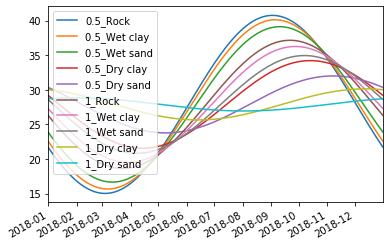

In [104]:
# weather.ground_temperature_500_weatherfile.plot()

# weather.ground_temperature_calculated.plot()
# weather.ground_temperatures

from climate.compute.ground_temperature import annual_ground_temperature_at_depth

for depth in [0.5, 1]:
    for diff in ["Rock", "Wet clay", "Wet sand", "Dry clay", "Dry sand"]:

        annual_ground_temperature_at_depth(weather, depth=depth, soil_diffusivity=diff).plot(label="{}_{}".format(depth, diff), legend=True)


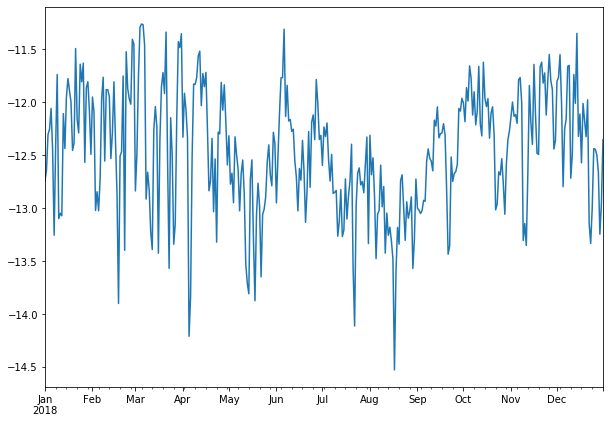

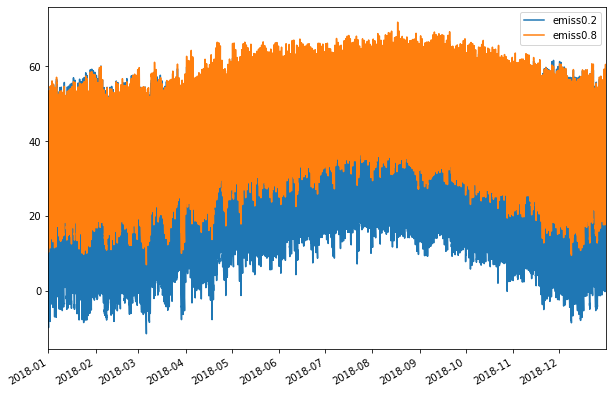

In [90]:
## from climate.compute.mean_radiant_temperature import mrt_openfield, openfield_mean_radiant_temperature

mrt1 = openfield_mean_radiant_temperature(weather, ground_roughness="Medium rough", ground_emissivity=0.2, ground_absorptivity=0.3)

mrt2 = openfield_mean_radiant_temperature(weather, ground_roughness="Medium rough", ground_emissivity=0.8, ground_absorptivity=0.3)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
(mrt1-mrt2).resample("D").mean().plot(ax=ax)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
mrt1.plot(ax=ax, label="emiss0.2", legend=True)
mrt2.plot(ax=ax, label="emiss0.8", legend=True)

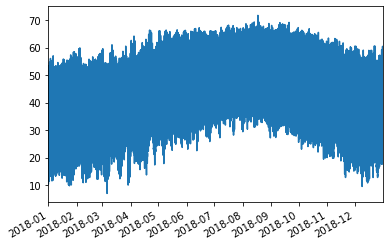

In [87]:
mrt.plot()

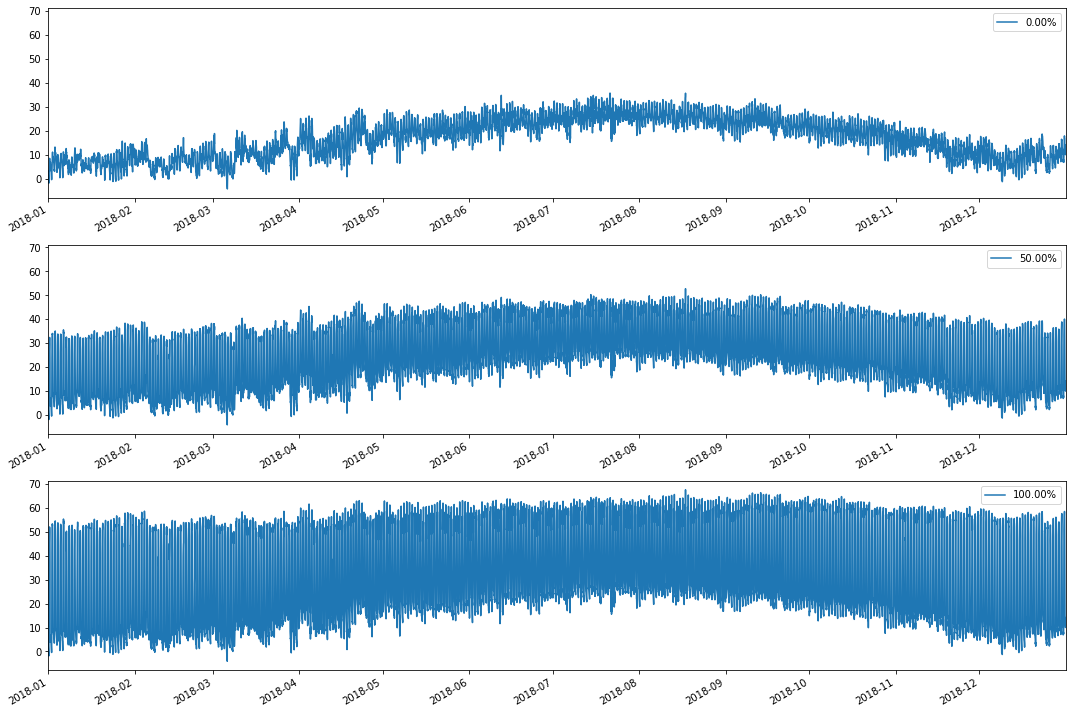

In [82]:
# Calculate MRT for comparison with Navid's GH script
from climate.compute.mean_radiant_temperature import mrt_openfield, openfield_mean_radiant_temperature

n = 3

fig, ax = plt.subplots(n, 1, figsize=(15, 10), sharey=True)
for f, st in enumerate(np.linspace(0, 1, n)):
    openfield_mean_radiant_temperature(weather, ground_roughness="Medium rough", ground_emissivity=0.5, ground_absorptivity=0.6, shading_transmissivity=st).plot(ax=ax[f], label="{:.2%}".format(st), legend=True)
plt.tight_layout()

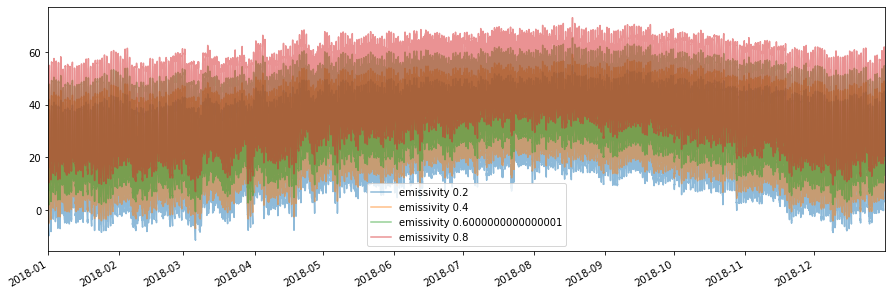

In [25]:
from climate.compute.mean_radiant_temperature import mrt_solar_adjusted, mrt_openfield, mean_radiant_temperature_of

# Run MRT calculation
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for emissivity in np.arange(0.2, 0.9, 0.2):
    mean_radiant_temperature_of(weather, ground_roughness="Medium rough", ground_emissivity=emissivity, ground_absorptivity=0.6).plot(label="emissivity {}".format(emissivity), legend=True, alpha=0.5)



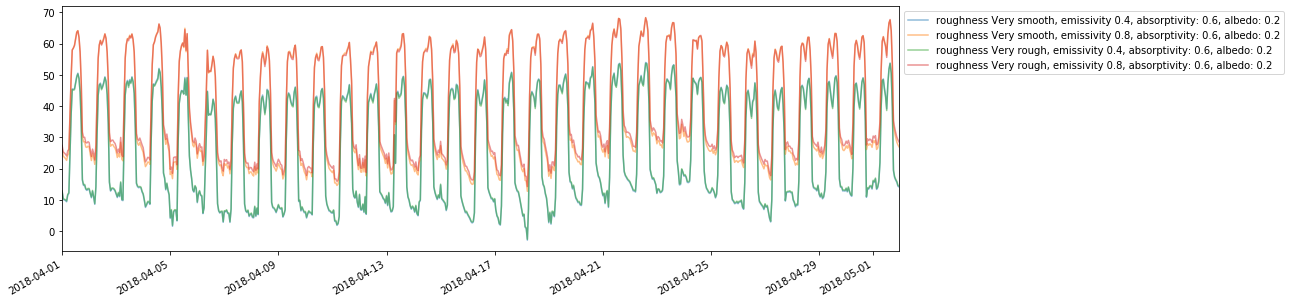

In [30]:
roughness = "Medium rough"
emissivity = 0.5
absorptivity = 0.5
albedo = 0.5


fig, ax = plt.subplots(1, 1, figsize=(15, 5))

for roughness in ["Very smooth", "Very rough"]:
    for emissivity in [0.4, 0.8]:
        for absorptivity in [0.6]:
            for albedo in [0.2]:
                mean_radiant_temperature_of(weather, ground_roughness=roughness, ground_emissivity=emissivity, ground_absorptivity=absorptivity, ground_albedo=albedo)["2018-04-01":"2018-05-01"].plot(label="roughness {}, emissivity {}, absorptivity: {}, albedo: {}".format(roughness, emissivity, absorptivity, albedo), alpha=0.5)
                
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for emissivity in np.arange(0.2, 0.9, 0.2):
    mean_radiant_temperature_of(weather, ground_roughness="Medium rough", ground_emissivity=0.8, ground_absorptivity=0.6, ground_albedo=0.8).plot(label="emissivity {}".format(emissivity), legend=True, alpha=0.5)


AttributeError: 'NoneType' object has no attribute 'plot'

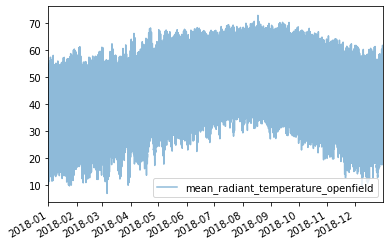

In [17]:
weather.mean_radiant_temperature_openfield.plot(alpha=0.5, legend=True)
weather.mean_radiant_temperature_solar_adjusted.plot(alpha=0.5, legend=True)

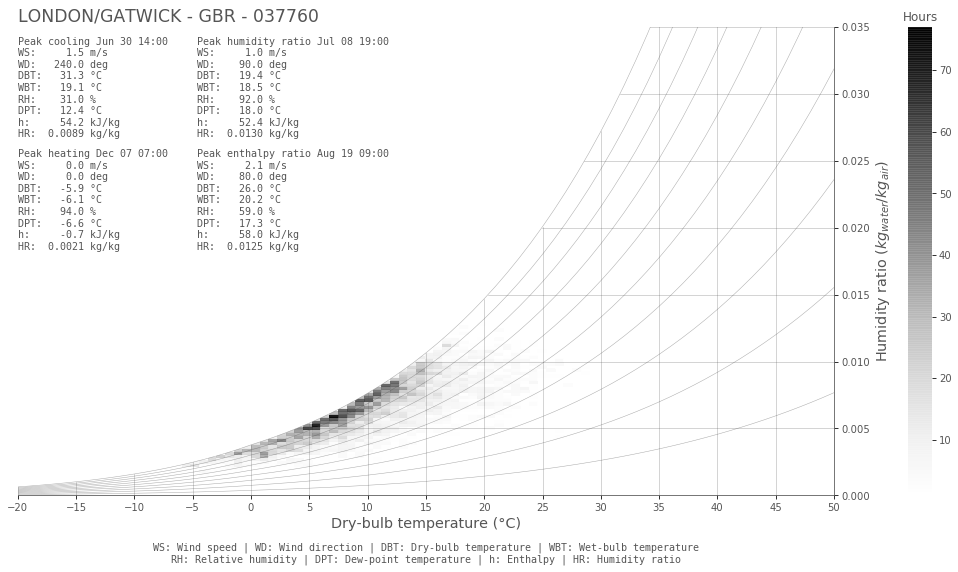

In [3]:
from climate.plot.psychrometric import psychrometric

a = psychrometric(weather, bins=50, tone_color="#555555")
a

In [4]:
#     # # enthalpy grid/curves
#     # for enthalpy in enthalpy_plot_range:
#     #     ys = [0, 0.030]
#     #     xs = np.array([GetTDryBulbFromEnthalpyAndHumRatio(enthalpy, i) for i in ys]) / 1000
#     #     if (enthalpy <= 50) & (enthalpy != 30):
#     #         ax.text(xs[0], 0.0002, "{}kJ/kg".format(enthalpy), ha="right", va="bottom", color="k", zorder=9,
#     #                 fontsize="small")
#     #     else:
#     #         pass
#     #     # ax.text(50, ys[0], "{}kJ/kg".format(enthalpy), ha="right", va="bottom", color="#555555", zorder=9, fontsize="small")
#     #     ax.plot(xs, ys, color="k", alpha=1, lw=0.2)

(array([0.324761  , 9.94010741]),
 {'with_constant_rh': True,
  'constant_rh_label': 'Constant relative humidity',
  'constant_rh_curves': [10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90],
  'constant_rh_labels': [20, 30, 40, 50, 60, 70, 80],
  'constant_rh_labels_loc': 0.85,
  'with_constant_v': True,
  'constant_v_label': 'Constant specific volume',
  'constant_v_step': 0.02,
  'range_vol_m3_kg': [0.78, 0.98],
  'constant_v_labels': [0.8, 0.9, 0.96],
  'constant_v_labels_loc': 1.0,
  'with_constant_h': True,
  'constant_h_label': 'Constant enthalpy',
  'constant_h_step': 5,
  'range_h': [5, 155],
  'constant_h_labels': [5, 25, 50, 75, 100, 125],
  'constant_h_labels_loc': 1.0,
  'with_constant_wet_temp': True,
  'constant_wet_temp_label': 'Constant wet bulb temperature',
  'constant_wet_temp_step': 5,
  'range_wet_temp': [-10, 40],
  'constant_wet_temp_labels': [0, 5, 10, 15, 20, 25, 30, 35],
  'constant_wet_temp_labels_loc': 0.05,
  'with_constant_dry_temp': True,
  'constant_temp_label

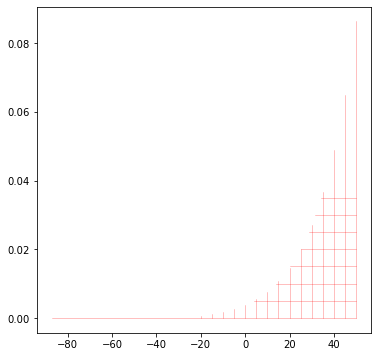

In [22]:
from scipy.interpolate import interp1d
from climate.compute.psychrometrics import sat_air_enthalpy
from climate.compute.psychrometrics import dry_air_enthalpy
from climate.compute.psychrometrics import humidity_ratio_from_vapor_pressure
from climate.compute.psychrometrics import humidity_ratio_from_relative_humidity
from climate.compute.psychrometrics import humidity_ratio_from_enthalpy
from climate.compute.psychrometrics import moist_air_enthalpy
from climate.compute.psychrometrics import moist_air_volume
from climate.compute.psychrometrics import dew_point_from_vapor_pressue
from climate.compute.psychrometrics import dry_bulb_temperature_from_enthalpy
from climate.compute.psychrometrics import wet_bulb_temperature_from_humidity_ratio
from climate.compute.psychrometrics import saturation_vapor_pressure
from climate.compute.psychrometrics import degree_of_saturation
from climate.compute.psychrometrics import vapor_pressure_from_humidity_ratio
from climate.compute.psychrometrics import wet_bulb_temperature_from_relative_humidity
tone_color="red"

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

pressure = 101325
hr_range = np.arange(0, 0.035, 0.005)
rh_range = np.arange(0, 110, 10)
enthalpy_range = np.arange(5, 105, 5)
dbt_limits = [-20, 50]
dbt_step = 5
dbt_detailed_step = 1
dbt_range = np.arange(dbt_limits[0], dbt_limits[1] + dbt_step, dbt_step)
dbt_range_detailed = np.arange(dbt_limits[0], dbt_limits[1] + dbt_detailed_step, dbt_detailed_step)

# Plot constant lines for Dry-Bulb Temperature
saturation_humidity_ratio = humidity_ratio_from_vapor_pressure(saturation_vapor_pressure(dbt_range), pressure)
min_humidity_ratio = np.repeat(hr_range[0], len(saturation_humidity_ratio))
ax.plot([dbt_range, dbt_range], [min_humidity_ratio, saturation_humidity_ratio], color=tone_color, alpha=0.5, lw=0.5, zorder=8)

# Plot constant lines for Humidity Ratio
min_x = dew_point_from_vapor_pressue(dbt_range[-1], vapor_pressure_from_humidity_ratio(hr_range, pressure))
max_x = np.repeat(dbt_range[-1], len(min_x))
ax.plot([min_x, max_x], [hr_range, hr_range], color=tone_color, alpha=0.5, lw=0.5, zorder=8)

# xs = dbt_range
# ys = humidity_ratio_from_enthalpy(sat_air_enthalpy(dbt_range, pressure), dbt_range)

# top = wet_bulb_temperature_from_relative_humidity(dbt_range, 1, pressure)
# bottom = wet_bulb_temperature_from_humidity_ratio()
# ax.scatter(wet_bulb_temperature_from_relative_humidity(dbt_range, 0, pressure), saturation_humidity_ratio)

# known - humidity_ratio(0), wet_bulb(dbt_range)
# needed - dbt at wet_bulb
# method

from psychrochart import PsychroCurves, PsychroChart, PsychroCurve

p = PsychroChart()

p.constant_h_data.curves[1].x_data, p.chart_params

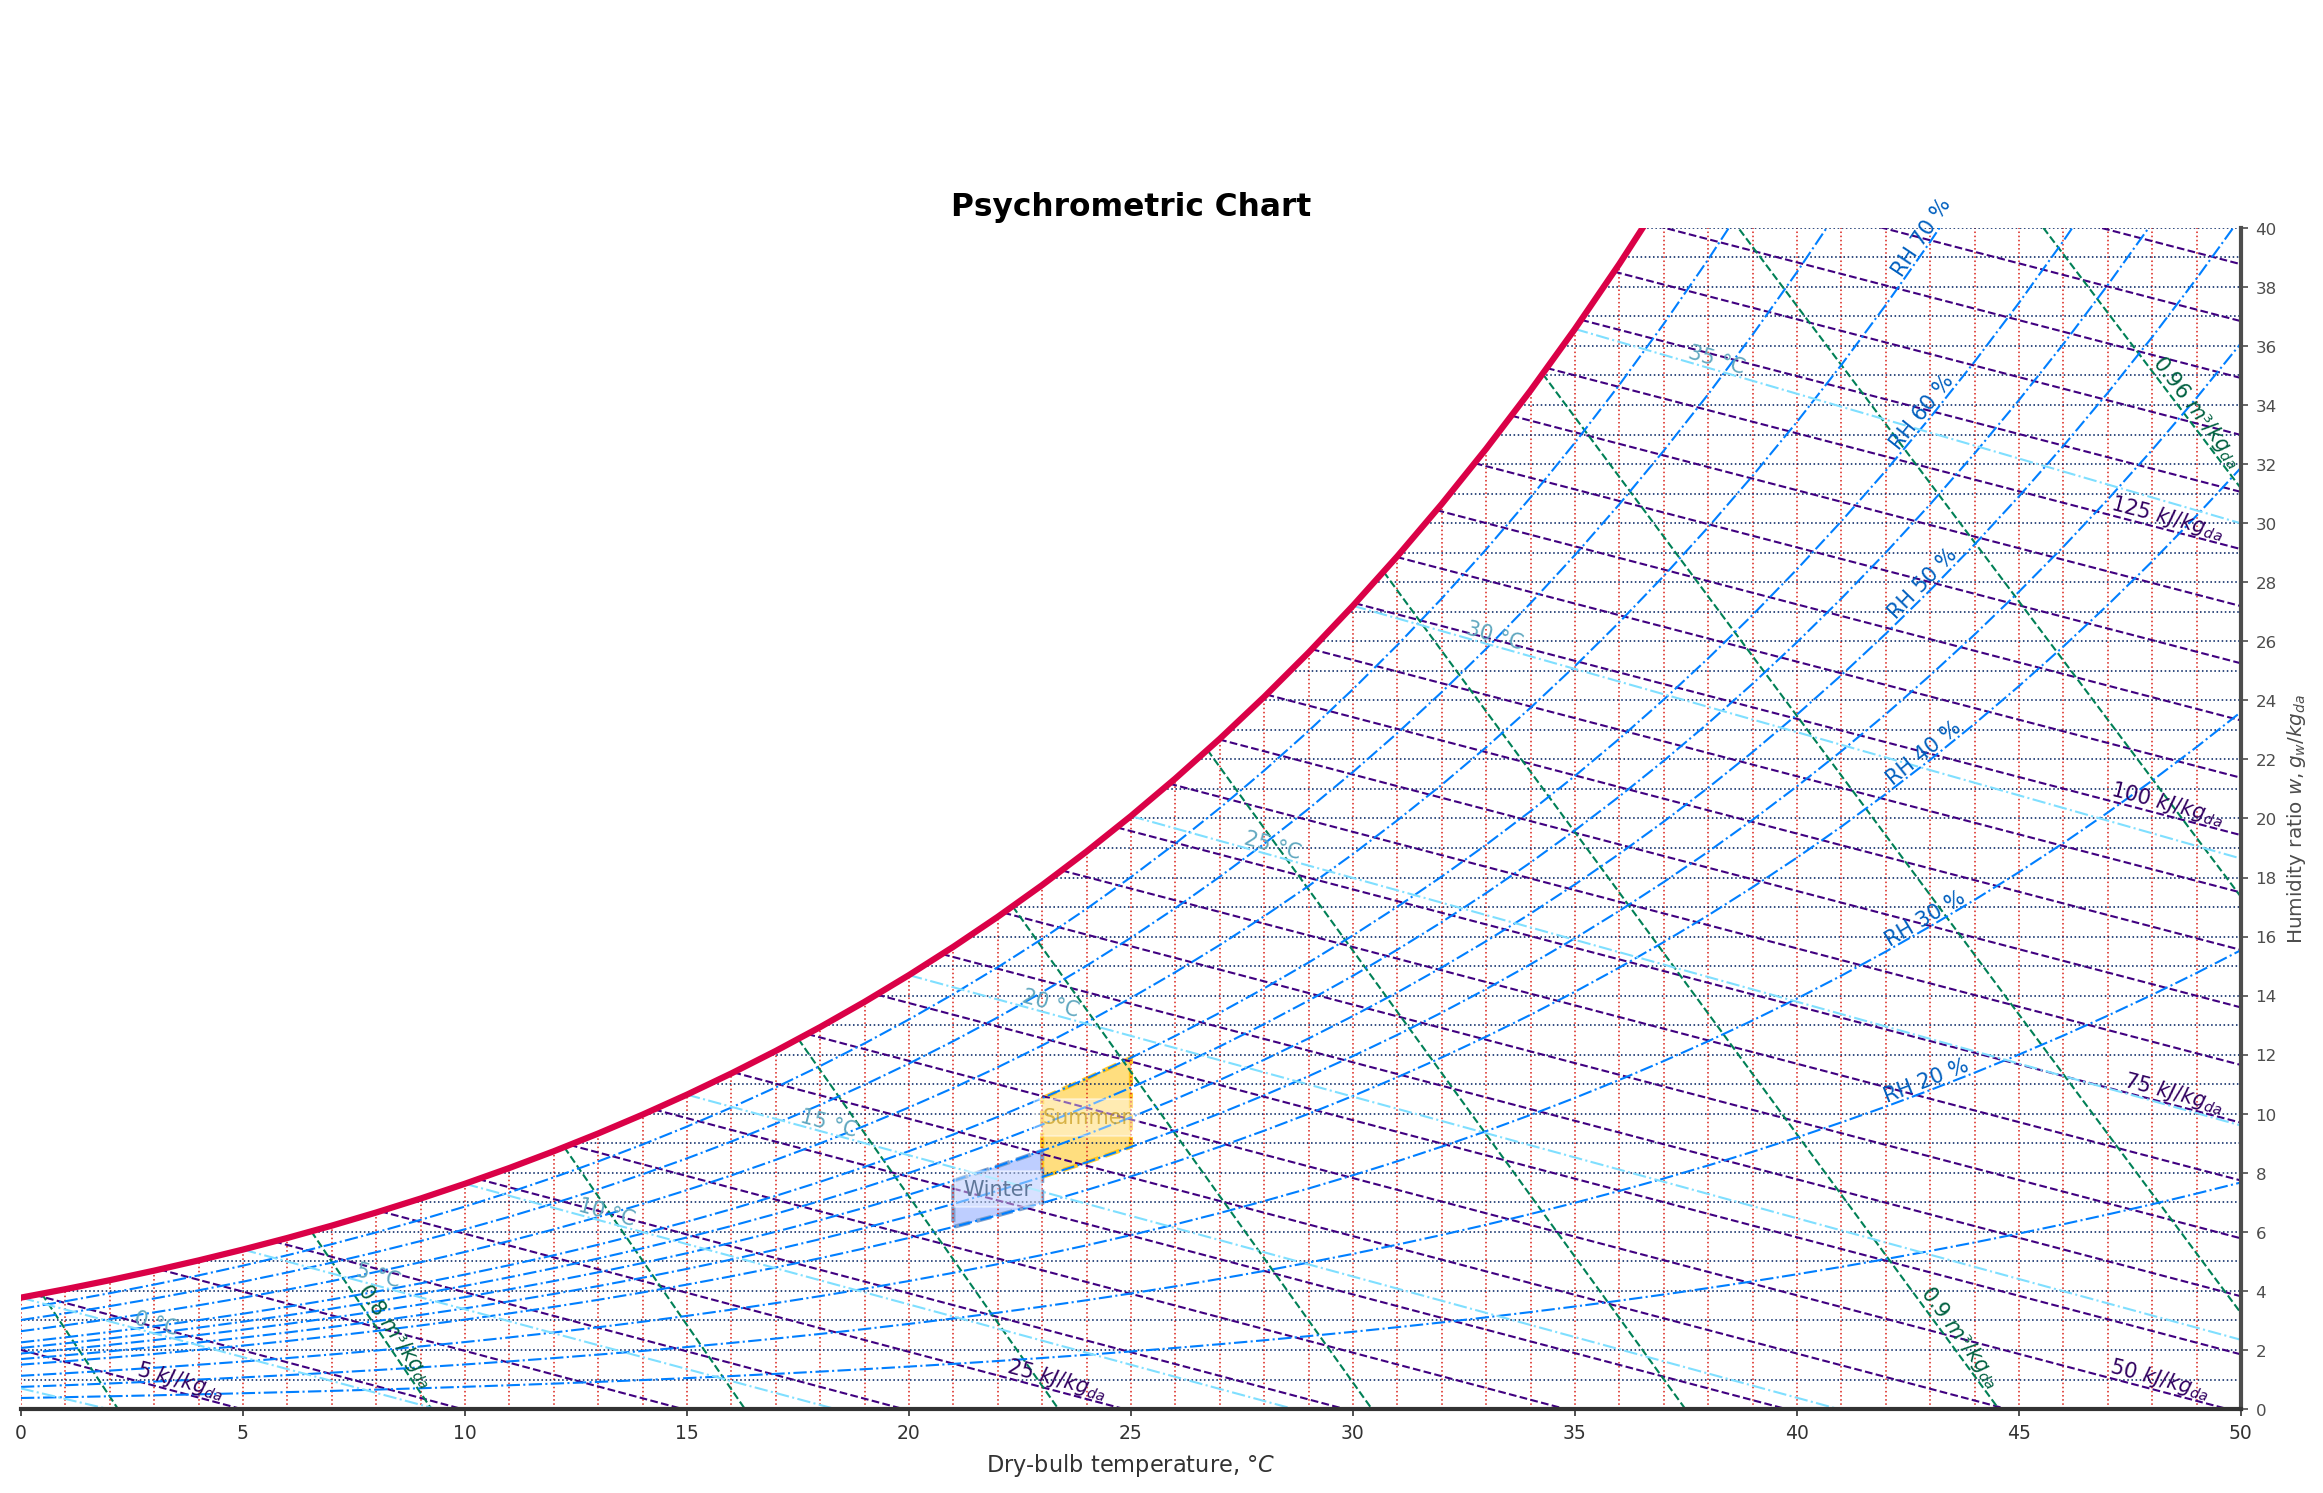

In [401]:
from psychrochart import PsychroChart, load_config

# Load default style:
chart_default = PsychroChart()
ax = chart_default.plot()
ax.get_figure()



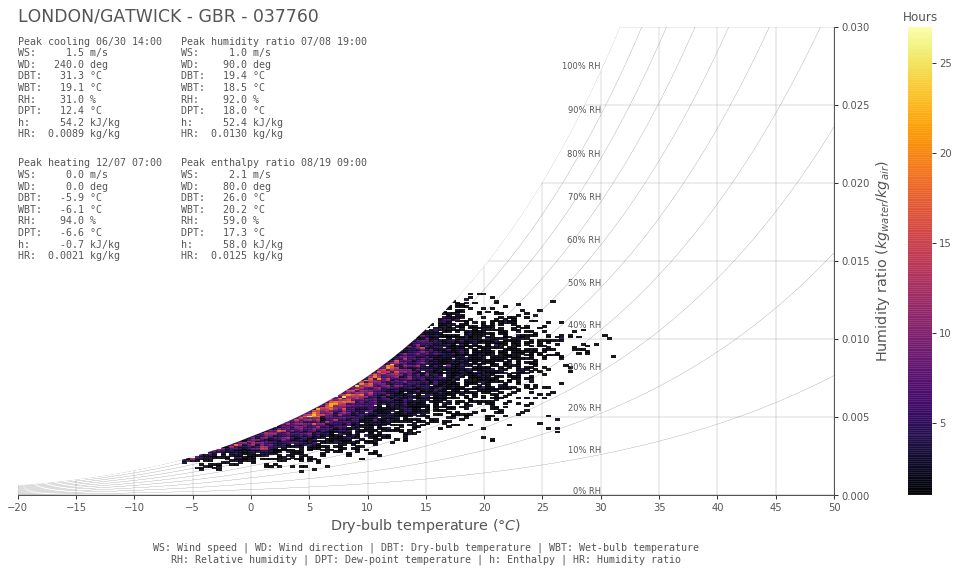

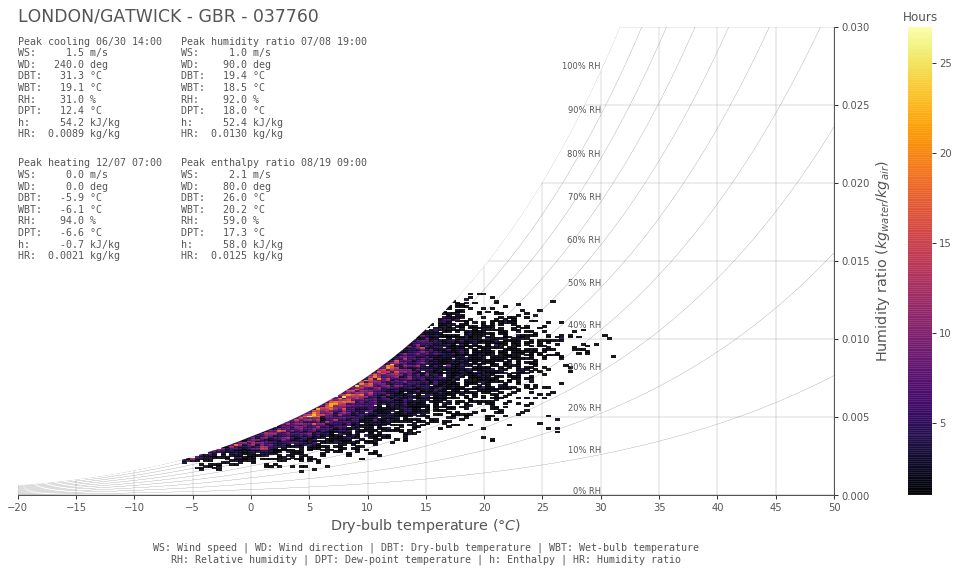

In [332]:
from climate.plot.heatmap import heatmap
from climate.plot.diurnal import diurnal
from climate.plot.radiation_rose import radiation_rose
from climate.plot.wind_rose import windrose
from climate.plot.psychrometric import psychrometric
# a = heatmap(weather, "dry_bulb_temperature", cmap="inferno", tone_color="#555555", save=True)
# b = diurnal(weather, dew_point=True, tone_color="#555555", save=True)
# c = radiation_rose(weather, season_period="Annual", day_period="Daily", n_sector=36, tone_color="#555555", same_scale=False, save=False)
# d = windrose(weather, season_period="Annual", day_period="Daily", cmap="viridis", n_sector=36, tone_color="#555555", save=False)
e = psychrometric(weather, bins=100, cmap="inferno", tone_color="#555555", save=False)
e

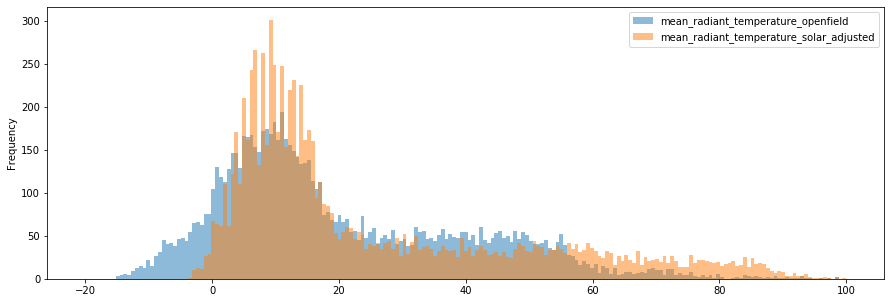

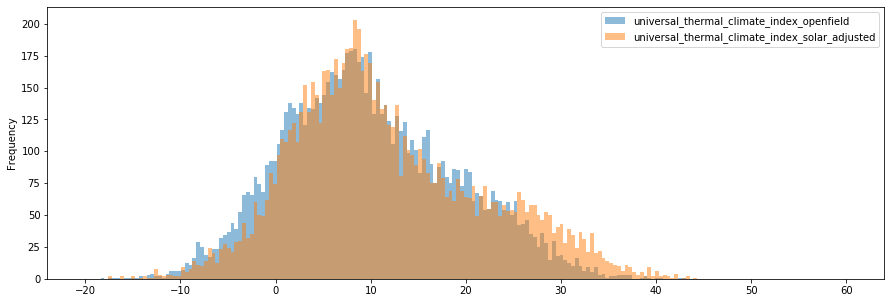

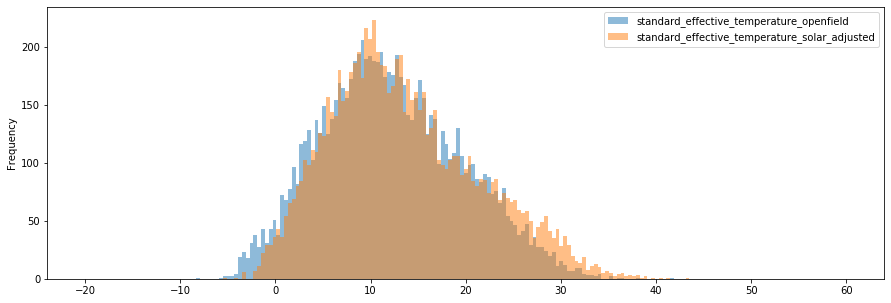

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
weather.mean_radiant_temperature_openfield.plot(ax=ax, legend=True, kind="hist", bins=np.linspace(-20, 100, 200), alpha=0.5)
weather.mean_radiant_temperature_solar_adjusted.plot(ax=ax, legend=True, kind="hist", bins=np.linspace(-20, 100, 200), alpha=0.5)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
weather.universal_thermal_climate_index_openfield.plot(ax=ax, legend=True, kind="hist", bins=np.linspace(-20, 60, 200), alpha=0.5)
weather.universal_thermal_climate_index_solar_adjusted.plot(ax=ax, legend=True, kind="hist", bins=np.linspace(-20, 60, 200), alpha=0.5)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
weather.standard_effective_temperature_openfield.plot(ax=ax, legend=True, kind="hist", bins=np.linspace(-20, 60, 200), alpha=0.5)
weather.standard_effective_temperature_solar_adjusted.plot(ax=ax, legend=True, kind="hist", bins=np.linspace(-20, 60, 200), alpha=0.5)

In [18]:
# Method to create DataFrame from attributes
self = weather
[type(getattr(self, name)).__name__ for name in dir(self) if name[:2] != '__' and name[-2:] != '__']



,aerosol_optical_depth,albedo,atmospheric_station_pressure,calculated_ground_temperature_500,ceiling_height,data_source_and_uncertainty_flags,days_since_last_snowfall,degree_of_saturation,dew_point_temperature,diffuse_horizontal_illuminance,...,specific_volume_moist_air,total_sky_cover,visibility,ground_temperature_2000_weatherfile,ground_temperature_4000_weatherfile,ground_temperature_500_weatherfile,wet_bulb_temperature,wind_direction,wind_speed,zenith_luminance
2018-01-01 00:00:00+00:00,0.040,0.0,101000,11.699483,22000,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,88,0.889276,1.1,0,...,0.789126,2,40.0,5.730000,7.350000,4.160000,2.000390,220,1.0,0
2018-01-01 01:00:00+00:00,0.040,0.0,101000,11.694872,22000,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,88,0.929568,0.2,0,...,0.784518,1,40.0,5.730376,7.349745,4.161532,0.784479,220,2.6,0
2018-01-01 02:00:00+00:00,0.040,0.0,100900,11.690260,22000,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,88,0.949706,-0.4,0,...,0.782198,0,40.0,5.730753,7.349489,4.163065,-0.098107,220,1.5,0
2018-01-01 03:00:00+00:00,0.040,0.0,100900,11.685648,22000,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,88,0.969830,-0.8,0,...,0.780037,0,40.0,5.731129,7.349234,4.164597,-0.666400,240,2.1,0
2018-01-01 04:00:00+00:00,0.040,0.0,100900,11.681035,22000,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,88,0.979888,-1.1,0,...,0.779115,0,40.0,5.731505,7.348978,4.166129,-0.908984,230,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+00:00,0.088,0.0,101500,11.722525,660,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,88,0.768177,3.8,0,...,0.799971,9,25.0,5.735168,7.355330,4.162907,5.702009,240,4.1,0
2018-12-31 20:00:00+00:00,0.088,0.0,101400,11.717918,720,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,88,0.778267,3.7,0,...,0.799862,6,28.0,5.733876,7.353997,4.162180,5.500562,240,4.6,0
2018-12-31 21:00:00+00:00,0.088,0.0,101300,11.713311,660,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,88,0.788380,3.4,0,...,0.799095,6,28.0,5.732584,7.352665,4.161454,5.110260,240,5.1,0
2018-12-31 22:00:00+00:00,0.088,0.0,101300,11.708702,690,C9C9C9C9*0?9?9?9?9?9?9?9A7A7A7A7A7A7*0E8*0*0,88,0.818655,2.8,0,...,0.796047,7,30.0,5.731292,7.351332,4.160727,4.394990,250,7.7,0


# MRT calculation method - not yet integrated!

In [9]:
import pandas as pd
import numpy as np
import math
from scipy import spatial

def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def wind_speed_at_height(source_wind_speed, source_wind_height, target_wind_height, terrain_roughness="Airport runway areas", log_method=True):
    """

    :param source_wind_speed: The wind speed to be translated (m/s)
    :param source_wind_height: The height at which the source wind speed was measured
    :param target_wind_height: The height to which the source wind speed will be translated
    :param terrain_roughness: A terrain roughness value from the European Wind Atlas, page 58, Figure 3.1: Roughness length, surface characteristics and roughness class.
    :param log_method:
    :return:
    """
    roughness = {
        "City": 1,
        "Forest": 0.8,
        "Suburbs": 0.5,
        "Shelter belts": 0.3,
        "Many trees and/or bushes": 0.2,
        "Farmland with closed appearance": 0.1,
        "Farmland with open appearance": 0.05,
        "Farmland with very few buildings, trees etc. airport areas with buildings and trees": 0.03,
        "Airport runway areas": 0.01,
        "Mown grass": 0.0075,
        "Bare soil (smooth)": 0.005,
        "Snow surfaces (smooth)": 0.001,
        "Sand surfaces (smooth)": 0.0003,
        "Water areas (lakes, fjords, open sea)": 0.0001
    }

    if source_wind_speed == 0:
        return 0
    if log_method:
        return source_wind_speed * (math.log(target_wind_height / roughness[terrain_roughness]) / math.log(source_wind_height / roughness[terrain_roughness]))
    wind_shear_exponent = 1 / 7
    return source_wind_speed * ((target_wind_height / source_wind_height) ** wind_shear_exponent)

def ground_temperature_at_depth(depth, annual_average_temperature, annual_temperature_range, days_since_coldest_day, soil_diffusivity=0.01):
    soil_diffusivities = {
        "Rock": 0.02,
        "Wet clay": 0.015,
        "Wet sand": 0.01,
        "Dry clay": 0.002,
        "Dry sand": 0.001
    }

    w = 2 * math.pi / 365
    dd = math.sqrt(2 * soil_diffusivity / w)

    return annual_average_temperature - (annual_temperature_range / 2) * math.exp(-depth / dd) * math.cos((w * days_since_coldest_day) - (depth / dd))


# Define process globals - affecting how the calculation is run
pedestrian_height = 1.5
ground_roughness = "Medium rough"
ground_emissivity = 0.8
ground_absorptivity = 0.6
ground_thickness = 1

sigma = 5.670374419e-8

# Calculate pedestrian wind speed
pedestrian_wind_speed = pd.Series(name="pedestrian_wind_speed", index=weather.index, data=[wind_speed_at_height(source_wind_speed=i, source_wind_height=10, target_wind_height=pedestrian_height) for i in weather.wind_speed])

# Calculate sky emissivity (using https://bigladdersoftware.com/epx/docs/8-0/engineering-reference/page-031.html)
def sky_emissivity(dew_point_temperature, total_sky_cover):
    return (0.787 + 0.764 * np.log((dew_point_temperature + 273.15) / 273.15)) * (1 + 0.0224 * total_sky_cover - 0.0035 * np.power(total_sky_cover, 2) + 0.0028 * np.power(total_sky_cover, 3))
sky_emissivity = sky_emissivity(weather.dew_point_temperature, weather.total_sky_cover / 10)
weather.sky_emissivity = sky_emissivity

# Calculate ground surface convective heat transfer coefficient (using SimpleCombined method from https://bigladdersoftware.com/epx/docs/8-0/engineering-reference/page-020.html)
material = {
    "Very rough": {"D": 11.58, "E": 5.89, "F": 0},
    "Rough": {"D": 12.49, "E": 4.065, "F": 0.028},
    'Medium rough': {"D": 10.79, "E": 4.192, "F": 0},
    'Medium smooth': {"D": 8.23, "E": 4, "F": -0.057},
    'Smooth': {"D": 10.22, "E": 3.1, "F": 0},
    'Very smooth': {"D": 8.23, "E": 3.33, "F": -0.036},
}
ground_convective_heat_transfer_coefficient = material[ground_roughness]["D"] + material[ground_roughness]["E"] * pedestrian_wind_speed + material[ground_roughness]["F"] * np.power(pedestrian_wind_speed, 2)
ground_k_value = np.interp(np.power(weather.relative_humidity, 3), [0, 1e6], [0.33, 1.4])

# Calculate ground temperature (using https://www.cableizer.com/blog/post/soil-temperature-calculator/)
ground_temperature = pd.Series(name="ground_temperature", index=weather.index, data=[ground_temperature_at_depth(0.5, weather.dry_bulb_temperature.mean(), weather.dry_bulb_temperature.max() - weather.dry_bulb_temperature.min(), j, soil_diffusivity=0.01) for j in [i if i > 0 else i + 365 for i in (weather.index - weather.dry_bulb_temperature.resample("1D").mean().idxmin()).total_seconds() / 86400]])
# ground_temperature = weather.ground_temperature_1

# Generate sample vectors 
def generate_numerous_vectors(n_samples=1000):
    # Returns vec, alt, sky
    vectors = []
    thetas = []
    sky = []
    offset = 2 / n_samples
    increment = np.pi * (3 - np.sqrt(5))
    for i in range(n_samples):
        y = ((i * offset) - 1) + (offset / 2)
        r = np.sqrt(1 - np.power(y, 2))
        phi = i * increment
        x = np.cos(phi) * r
        z = np.sin(phi) * r
        theta = np.arctan(z / np.sqrt(np.power(x, 2) + np.power(y, 2)))
        theta = np.fabs(theta)
        thetas.append(theta)
        vec = unit_vector([x, y, z])
        vectors.append(vec)
        if z > 0:
            sky.append(True)
        else:
            sky.append(False)
    return np.array(vectors), np.array(thetas), np.array(sky)
sample_vectors, sample_vectors_altitude, sample_vectors_is_sky = generate_numerous_vectors(n_samples=1000)

# Define method for "closest point/s"
def closest_point(source_points, target_points, n_closest=1):
    """
    Find the closest n-points from a set of source points to a set of target points
    """
    target_distances, target_indices = spatial.KDTree(target_points).query(source_points, n_closest)
    return target_distances, target_indices

# Find the closest patch value indices and distances from the sample vectors
sample_vector_closest_patch_vector_distances, sample_vector_closest_patch_vector_indices = closest_point(sample_vectors, weather.patch_centroids, n_closest=3)

# Calculate the sun view factors for each of the sample vectors.
az = np.pi / 4  # 45 degrees
sun_view_factors = np.where(sample_vectors_is_sky, 0.0355 * np.sin(sample_vectors_altitude) + 2.33 * np.cos(sample_vectors_altitude) * np.sqrt(0.0213 * np.power(np.cos(az), 2) + 0.0091 * np.power(np.sin(az), 2)), 0)

# Run a pseudo raytrace to get rays intersecting geometry (there is none) - this only works when numerous vectors n-samples == 1000!
# TODO: Replace this with a Radiance/Numpy-based raytracing method
ray_last_bounce_vector = np.array([[0.04471, -0.999, 0], [-0.057073, -0.997, 0.052284], [0.008732, -0.995, 0.099493],  [0.071865, -0.993, 0.093736], [-0.131816, -0.991, 0.023316], [0.124805, -0.989, 0.07939],  [-0.041724, -0.987, 0.15521], [-0.079532, -0.985, 0.153133], [0.172465, -0.983, 0.062984],  [-0.17933, -0.981, 0.074025], [0.086405, -0.979, 0.184643], [0.063819, -0.977, 0.203465],  [-0.192254, -0.975, 0.111415], [0.225422, -0.973, 0.049558], [-0.137502, -0.971, 0.195582],  [-0.03175, -0.969, 0.245012], [0.194814, -0.967, 0.16419], [-0.262026, -0.965, 0.010836],  [0.191031, -0.963, 0.190101], [-0.012774, -0.961, 0.276253], [-0.181581, -0.959, 0.217595],  [0.287497, -0.957, 0.038682], [-0.243471, -0.955, 0.169401], [0.066496, -0.953, 0.295583],  [0.153724, -0.951, 0.268269], [-0.300361, -0.949, 0.095823], [0.291613, -0.947, 0.134733],  [-0.126269, -0.945, 0.301714], [-0.112634, -0.943, 0.313152], [0.299554, -0.941, 0.157437],  [-0.332558, -0.939, 0.087661], [0.18893, -0.937, 0.29383], [0.060069, -0.935, 0.349524],  [-0.284527, -0.933, 0.220353], [0.363773, -0.931, 0.030138], [-0.251313, -0.929, 0.271663],  [0.00183, -0.927, 0.375057], [0.255294, -0.925, 0.281425], [-0.383158, -0.923, 0.035511],  [0.31031, -0.921, 0.235514], [-0.070566, -0.919, 0.387891], [-0.21245, -0.917, 0.337604],  [0.389106, -0.915, 0.106638], [-0.362956, -0.913, 0.186263], [0.143359, -0.911, 0.386687],  [0.15715, -0.909, 0.386035], [-0.380557, -0.907, 0.180353], [0.406529, -0.905, 0.125337],  [-0.217236, -0.903, 0.370674], [-0.091081, -0.901, 0.42415], [0.357036, -0.899, 0.253622],  [-0.438637, -0.897, 0.054667], [0.289126, -0.895, 0.339678], [0.016402, -0.893, 0.449758],  [-0.318671, -0.891, 0.323369], [0.45731, -0.889, 0.023383], [-0.355978, -0.887, 0.294127],  [0.064335, -0.885, 0.461125], [0.266191, -0.883, 0.386592], [-0.461068, -0.881, 0.106091],  [0.414864, -0.879, 0.235046], [-0.148269, -0.877, 0.457042], [-0.200906, -0.875, 0.440468],  [0.448985, -0.873, 0.190482], [-0.463095, -0.871, 0.164019], [0.232336, -0.869, 0.436874],  [0.124662, -0.867, 0.482463], [-0.420725, -0.865, 0.273433], [0.498316, -0.863, 0.08314],  [-0.313378, -0.861, 0.400591], [-0.039782, -0.859, 0.510428], [0.376564, -0.857, 0.351782],  [-0.518603, -0.855, 0.00506], [0.388262, -0.853, 0.348774], [-0.051015, -0.851, 0.522682],  [-0.317388, -0.849, 0.42245], [0.522538, -0.847, 0.097697], [-0.453991, -0.845, 0.282608],  [0.144706, -0.843, 0.518084], [0.244671, -0.841, 0.482551], [-0.509269, -0.839, 0.191636],  [0.507818, -0.837, 0.203844], [-0.238073, -0.835, 0.496081], [-0.160427, -0.833, 0.529504],  [0.478549, -0.831, 0.283602], [-0.54735, -0.829, 0.114747], [0.327811, -0.827, 0.45674],  [0.067154, -0.825, 0.561129], [-0.43076, -0.823, 0.370293], [0.570644, -0.821, 0.018023],  [-0.410651, -0.819, 0.400755], [0.032254, -0.817, 0.575735], [0.366908, -0.815, 0.448502],  [-0.576279, -0.813, 0.083269], [0.483477, -0.811, 0.329437], [-0.134602, -0.809, 0.57219],  [-0.288598, -0.807, 0.51523], [0.563422, -0.805, 0.185823], [-0.543438, -0.803, 0.244677],  [0.236498, -0.801, 0.549971], [0.197992, -0.799, 0.567801], [-0.531869, -0.797, 0.286193],  [0.588054, -0.795, 0.148889], [-0.334474, -0.793, 0.509194], [-0.097739, -0.791, 0.603959],  [0.48206, -0.789, 0.380916], [-0.615314, -0.787, 0.044938], [0.425103, -0.785, 0.450624],  [-0.009103, -0.783, 0.621955], [-0.41508, -0.781, 0.466634], [0.623754, -0.779, 0.063953],  [-0.505124, -0.777, 0.375661], [0.119171, -0.775, 0.620623], [0.332634, -0.773, 0.540209],  [-0.612516, -0.771, 0.174308], [0.571551, -0.769, 0.286301], [-0.228906, -0.767, 0.599427],  [-0.236996, -0.765, 0.598839], [0.581393, -0.763, 0.282512], [-0.621791, -0.761, 0.185081],  [0.334671, -0.759, 0.558493], [0.130947, -0.757, 0.640159], [-0.530847, -0.755, 0.384936],  [0.653732, -0.753, 0.075004], [-0.432873, -0.751, 0.498618], [-0.017685, -0.749, 0.662334],  [0.462007, -0.747, 0.478059], [-0.66583, -0.745, 0.040561], [0.520092, -0.743, 0.421255],  [-0.099273, -0.741, 0.664126], [-0.37664, -0.739, 0.558588], [0.657171, -0.737, 0.15798],  [-0.593193, -0.735, 0.328476], [0.216207, -0.733, 0.644954], [0.277108, -0.731, 0.623578],  [-0.627511, -0.729, 0.273477], [0.649446, -0.727, 0.222914], [-0.329315, -0.725, 0.604919],  [-0.166295, -0.723, 0.670535], [0.577299, -0.721, 0.383255], [-0.686618, -0.719, 0.107681],  [0.43484, -0.717, 0.544817], [0.047521, -0.715, 0.697508], [-0.507677, -0.713, 0.483627],  [0.703058, -0.711, 0.013721], [-0.529195, -0.709, 0.466125], [0.075563, -0.707, 0.703165],  [0.420445, -0.705, 0.57114], [-0.697768, -0.703, 0.137517], [0.609088, -0.701, 0.37096],  [-0.199088, -0.699, 0.68685], [-0.318024, -0.697, 0.642691], [0.67044, -0.695, 0.259779],  [-0.671636, -0.693, 0.262023], [0.319096, -0.691, 0.648612], [0.203375, -0.689, 0.695642],  [-0.621483, -0.687, 0.37655], [0.714467, -0.685, 0.142519], [-0.431664, -0.683, 0.589217],  [-0.079919, -0.681, 0.727909], [0.55202, -0.679, 0.483976], [-0.735808, -0.677, 0.016055],  [0.533042, -0.675, 0.510138], [-0.048575, -0.673, 0.738046], [-0.46386, -0.671, 0.57844],  [0.734551, -0.669, 0.113466], [-0.619773, -0.667, 0.413512], [0.178104, -0.665, 0.725296],  [0.359455, -0.663, 0.656676], [-0.710301, -0.661, 0.241974], [0.688814, -0.659, 0.302083],  [-0.304562, -0.657, 0.689633], [-0.241822, -0.655, 0.715889], [0.663403, -0.653, 0.36536],  [-0.737641, -0.651, 0.179123], [0.423871, -0.649, 0.631769], [0.11446, -0.647, 0.75385],  [-0.594936, -0.645, 0.479611], [0.76434, -0.643, 0.048329], [-0.532115, -0.641, 0.553147],  [0.01876, -0.639, 0.768978], [0.506693, -0.637, 0.580942], [-0.767678, -0.635, 0.086286],  [0.625673, -0.633, 0.4559], [-0.153719, -0.631, 0.760401], [-0.401133, -0.629, 0.665921],  [0.747154, -0.627, 0.220525], [-0.701333, -0.625, 0.342793], [0.286173, -0.623, 0.727995],  [0.281309, -0.621, 0.73159], [-0.703025, -0.619, 0.350135], [0.756413, -0.617, 0.217142],  [-0.411895, -0.615, 0.672397], [-0.150776, -0.613, 0.775563], [0.636307, -0.611, 0.470949],  [-0.788845, -0.609, 0.082716], [0.526811, -0.607, 0.594997], [0.013486, -0.605, 0.796111],  [-0.548752, -0.603, 0.579018], [0.797258, -0.601, 0.05638], [-0.627132, -0.599, 0.4979],  [0.126336, -0.597, 0.792231], [0.442806, -0.595, 0.670744], [-0.781025, -0.593, 0.195834],  [0.709479, -0.591, 0.383872], [-0.264324, -0.589, 0.763683], [-0.321534, -0.587, 0.742999],  [0.740298, -0.585, 0.331262], [-0.771002, -0.583, 0.256255], [0.396112, -0.581, 0.71101],  [0.188529, -0.579, 0.793231], [-0.676008, -0.577, 0.45835], [0.809472, -0.575, 0.118869],  [-0.51747, -0.573, 0.635528], [-0.047808, -0.571, 0.819557], [0.58985, -0.569, 0.572989],  [-0.823365, -0.567, 0.024107], [0.624447, -0.565, 0.539297], [-0.096317, -0.563, 0.820825],  [-0.484233, -0.561, 0.671414], [0.811916, -0.559, 0.168259], [-0.713495, -0.557, 0.425061],  [0.239369, -0.555, 0.796666], [0.362215, -0.553, 0.750327], [-0.775155, -0.551, 0.309085],  [0.781591, -0.549, 0.296167], [-0.376853, -0.547, 0.747511], [-0.22741, -0.545, 0.807007],  [0.713913, -0.543, 0.442131], [-0.826339, -0.541, 0.156468], [0.504393, -0.539, 0.674586],  [0.08388, -0.537, 0.839402], [-0.629805, -0.535, 0.563135], [0.846054, -0.533, 0.010204],  [-0.617877, -0.531, 0.579885], [0.063991, -0.529, 0.846206], [0.525187, -0.527, 0.668169],  [-0.839819, -0.525, 0.138129], [0.713591, -0.523, 0.46611], [-0.21163, -0.521, 0.826905],  [-0.403091, -0.519, 0.753762], [0.807528, -0.517, 0.283918], [-0.788338, -0.515, 0.336598],  [0.354422, -0.513, 0.781803], [0.267131, -0.511, 0.817019], [-0.749896, -0.509, 0.422582],  [0.839549, -0.507, 0.195215], [-0.487854, -0.505, 0.712021], [-0.121398, -0.503, 0.855718],  [0.668441, -0.501, 0.549714], [-0.865367, -0.499, 0.046245], [0.607661, -0.497, 0.619467],  [-0.029665, -0.495, 0.868386], [-0.565451, -0.493, 0.661223], [0.864718, -0.491, 0.105746],  [-0.709961, -0.489, 0.506788], [0.181406, -0.487, 0.854355], [0.44391, -0.485, 0.753471],  [-0.837346, -0.483, 0.256052], [0.791387, -0.481, 0.377288], [-0.3291, -0.479, 0.813789],  [-0.307419, -0.477, 0.823386], [0.783835, -0.475, 0.399973], [-0.849191, -0.473, 0.234832],  [0.468108, -0.471, 0.747686], [0.160079, -0.469, 0.86857], [-0.705593, -0.467, 0.532963],  [0.881342, -0.465, 0.08373], [-0.594017, -0.463, 0.657856], [-0.006373, -0.461, 0.887377],  [0.604819, -0.459, 0.650779], [-0.886597, -0.457, 0.071397], [0.702785, -0.455, 0.546871],  [-0.148977, -0.453, 0.878975], [-0.484438, -0.451, 0.749612], [0.864541, -0.449, 0.225762],  [-0.790871, -0.447, 0.417987], [0.301153, -0.445, 0.843375], [0.348016, -0.443, 0.826218],  [-0.815614, -0.441, 0.374557], [0.855351, -0.439, 0.275052], [-0.445396, -0.437, 0.781443],  [-0.199651, -0.435, 0.878017], [0.7411, -0.433, 0.513109], [-0.894014, -0.431, 0.122385],  [0.577157, -0.429, 0.694874], [0.043849, -0.427, 0.903188], [-0.643097, -0.425, 0.637026],  [0.90544, -0.423, 0.035354], [-0.692235, -0.421, 0.586148], [0.114612, -0.419, 0.900724],  [0.52445, -0.417, 0.742336], [-0.889048, -0.415, 0.193309], [0.786921, -0.413, 0.458461],  [-0.270834, -0.411, 0.870476], [-0.388677, -0.409, 0.825621], [0.845124, -0.407, 0.346579],  [-0.858112, -0.405, 0.315623], [0.41995, -0.403, 0.813162], [0.239855, -0.401, 0.88412],  [-0.774814, -0.399, 0.49037], [0.903418, -0.397, 0.161949], [-0.557281, -0.395, 0.730352],  [-0.082501, -0.393, 0.91583], [0.680098, -0.391, 0.62015], [-0.921235, -0.389, 0.002122],  [0.678477, -0.387, 0.62442], [-0.078569, -0.385, 0.919566], [-0.563731, -0.383, 0.731791],  [0.91081, -0.381, 0.158947], [-0.779662, -0.379, 0.498483], [0.238388, -0.377, 0.89501],  [0.429166, -0.375, 0.8217], [-0.872263, -0.373, 0.316274], [0.857559, -0.371, 0.356302],  [-0.391995, -0.369, 0.842721], [-0.280444, -0.367, 0.88694], [0.806591, -0.365, 0.464958],  [-0.909593, -0.363, 0.202169], [0.534588, -0.361, 0.76413], [0.122075, -0.359, 0.92532],  [-0.715647, -0.357, 0.600334], [0.933977, -0.355, 0.040778], [-0.661676, -0.353, 0.661496],  [0.041098, -0.351, 0.935473], [0.602079, -0.349, 0.718123], [-0.929775, -0.347, 0.12292],  [0.769223, -0.345, 0.537839], [-0.204055, -0.343, 0.916904], [-0.469259, -0.341, 0.814564],  [0.896937, -0.339, 0.283873], [-0.853778, -0.337, 0.396856], [0.361751, -0.335, 0.870006],  [0.321178, -0.333, 0.886541], [-0.836301, -0.331, 0.437081], [0.912582, -0.329, 0.242803],  [-0.509273, -0.327, 0.796061], [-0.162328, -0.325, 0.931678], [0.749578, -0.323, 0.577758],  [-0.943663, -0.321, 0.080369], [0.641997, -0.319, 0.697194], [-0.002442, -0.317, 0.948422],  [-0.639298, -0.315, 0.701479], [0.9459, -0.313, 0.085469], [-0.755733, -0.311, 0.576322],  [0.168069, -0.309, 0.936094], [0.50874, -0.307, 0.804323], [-0.919061, -0.305, 0.249602],  [0.846858, -0.303, 0.437061], [-0.329435, -0.301, 0.894914], [-0.361829, -0.299, 0.882994],  [0.86382, -0.297, 0.406947], [-0.912435, -0.295, 0.283616], [0.481531, -0.293, 0.826002],  [0.20302, -0.291, 0.934934], [-0.781735, -0.289, 0.552603], [0.950301, -0.287, 0.120658],  [-0.619605, -0.285, 0.731344], [-0.037161, -0.283, 0.9584], [0.675205, -0.281, 0.68201],  [-0.959149, -0.279, 0.046827], [0.739323, -0.277, 0.613736], [-0.130659, -0.275, 0.952525],  [-0.547402, -0.273, 0.791089], [0.938561, -0.271, 0.213686], [-0.836896, -0.269, 0.476701],  [0.295264, -0.267, 0.917349], [0.402172, -0.265, 0.876375], [-0.889036, -0.263, 0.374761],  [0.909206, -0.261, 0.324381], [-0.451556, -0.259, 0.853824], [-0.243922, -0.257, 0.935122],  [0.811971, -0.255, 0.525051], [-0.953907, -0.253, 0.16141], [0.59467, -0.251, 0.763784],  [0.077479, -0.249, 0.965399], [-0.709623, -0.247, 0.659868], [0.969496, -0.245, 0.007226],  [-0.720131, -0.243, 0.649894], [0.092052, -0.241, 0.96615], [0.585046, -0.239, 0.774984],  [-0.955371, -0.237, 0.176345], [0.823992, -0.235, 0.51557], [-0.259452, -0.233, 0.937228],  [-0.441993, -0.231, 0.866765], [0.911846, -0.229, 0.340729], [-0.90296, -0.227, 0.364876],  [0.419544, -0.225, 0.879408], [0.284807, -0.223, 0.932285], [-0.84015, -0.221, 0.495285],  [0.954502, -0.219, 0.202399], [-0.567361, -0.217, 0.794363], [-0.118283, -0.215, 0.969425],  [0.742388, -0.213, 0.635209], [-0.976925, -0.211, 0.033107], [0.698297, -0.209, 0.684616],  [-0.052474, -0.207, 0.976933], [-0.621483, -0.205, 0.756131], [0.969434, -0.203, 0.1378],  [-0.808253, -0.201, 0.553467], [0.222212, -0.199, 0.954474], [0.481084, -0.197, 0.854253],  [-0.932156, -0.195, 0.305057], [0.893766, -0.193, 0.404887], [-0.385692, -0.191, 0.902641],  [-0.325456, -0.189, 0.926476], [0.866144, -0.187, 0.463493], [-0.952119, -0.185, 0.243401],  [0.537853, -0.183, 0.822937], [0.15935, -0.181, 0.970488], [-0.773342, -0.179, 0.608195],  [0.981429, -0.177, 0.073949], [-0.673968, -0.175, 0.717734], [0.012145, -0.173, 0.984847],  [0.656532, -0.171, 0.73466], [-0.980705, -0.169, 0.098269], [0.789794, -0.167, 0.5902],  [-0.183758, -0.165, 0.969024], [-0.519244, -0.163, 0.838938], [0.949885, -0.161, 0.267951],  [-0.881704, -0.159, 0.444205], [0.350198, -0.157, 0.923424], [0.365656, -0.155, 0.917753],  [-0.889837, -0.153, 0.429861], [0.9468, -0.151, 0.284198], [-0.506323, -0.149, 0.849374],  [-0.200458, -0.147, 0.968611], [0.802338, -0.145, 0.578989], [-0.98301, -0.143, 0.115077],  [0.647295, -0.141, 0.749085], [0.028712, -0.139, 0.989876], [-0.690017, -0.137, 0.710709],  [0.989148, -0.135, 0.057971], [-0.768735, -0.133, 0.625585], [0.144304, -0.131, 0.980824],  [0.556279, -0.129, 0.820922], [-0.964959, -0.127, 0.229621], [0.866859, -0.125, 0.482629],  [-0.313263, -0.123, 0.941667], [-0.405197, -0.121, 0.906187], [0.911122, -0.119, 0.394583],  [-0.938595, -0.117, 0.324578], [0.472952, -0.115, 0.873551], [0.241391, -0.113, 0.963827],  [-0.829238, -0.111, 0.547763], [0.981681, -0.109, 0.156273], [-0.618435, -0.107, 0.778517],  [-0.069881, -0.105, 0.992014], [0.721776, -0.103, 0.68442], [-0.994739, -0.101, 0.017121],  [0.745205, -0.099, 0.659445], [-0.104063, -0.097, 0.989829], [-0.592002, -0.095, 0.800318],  [0.977316, -0.093, 0.190274], [-0.849328, -0.091, 0.519962], [0.275089, -0.089, 0.95729],  [0.443877, -0.087, 0.891854], [-0.929901, -0.085, 0.357853], [0.927563, -0.083, 0.364331],  [-0.437926, -0.081, 0.895354], [-0.281935, -0.079, 0.956175], [0.853912, -0.077, 0.51469],  [-0.977465, -0.075, 0.197323], [0.587551, -0.073, 0.805888], [0.111144, -0.071, 0.991265],  [-0.75165, -0.069, 0.655943], [0.997463, -0.067, 0.024063], [-0.719339, -0.065, 0.691611],  [0.063249, -0.063, 0.996007], [0.626233, -0.061, 0.777246], [-0.986906, -0.059, 0.150121],  [0.829215, -0.057, 0.556016], [-0.235881, -0.055, 0.970224], [-0.481498, -0.053, 0.874843],  [0.946088, -0.051, 0.319868], [-0.913776, -0.049, 0.403253], [0.401435, -0.047, 0.914681],  [0.321882, -0.045, 0.94571], [-0.876241, -0.043, 0.479951], [0.970397, -0.041, 0.238011],  [-0.55481, -0.039, 0.831062], [-0.152286, -0.037, 0.987644], [0.779491, -0.035, 0.625435],  [-0.997315, -0.033, 0.065367], [0.691279, -0.031, 0.721923], [-0.022077, -0.029, 0.999336],  [-0.658799, -0.027, 0.751834], [0.993686, -0.025, 0.109372], [-0.806632, -0.023, 0.590606],  [0.195845, -0.021, 0.98041], [0.517868, -0.019, 0.855249], [-0.959607, -0.017, 0.28083],  [0.897311, -0.015, 0.441144], [-0.363671, -0.013, 0.931437], [-0.361026, -0.011, 0.932491],  [0.896116, -0.009, 0.443729], [-0.960518, -0.007, 0.27813], [0.520388, -0.005, 0.853915],  [0.193095, -0.003, 0.981176], [-0.80516, -0.001, 0.593057], [0.994304, 0.001, 0.106576],  [-0.661175, 0.003, 0.750226], [-0.01924, 0.005, 0.999802], [0.689535, 0.007, 0.724218],  [-0.997628, 0.009, 0.06824], [0.7817, 0.011, 0.623557], [-0.155191, 0.013, 0.987799],  [-0.5528, 0.015, 0.833179], [0.970391, 0.017, 0.240941], [-0.878258, 0.019, 0.47781],  [0.324831, 0.021, 0.945539], [0.399165, 0.023, 0.916591], [-0.913436, 0.025, 0.406214],  [0.947884, 0.027, 0.317471], [-0.484464, 0.029, 0.87433], [-0.233359, 0.031, 0.971896],  [0.828525, 0.033, 0.558979], [-0.988446, 0.035, 0.147477], [0.629185, 0.037, 0.776375],  [0.060488, 0.039, 0.997407], [-0.718283, 0.041, 0.694542], [0.998712, 0.043, 0.026938],  [-0.754549, 0.045, 0.654699], [0.114128, 0.047, 0.992354], [0.586115, 0.049, 0.808745],  [-0.978384, 0.051, 0.200409], [0.856715, 0.053, 0.51306], [-0.285117, 0.055, 0.956914],  [-0.436101, 0.057, 0.898091], [0.928111, 0.059, 0.3676], [-0.932558, 0.061, 0.35583],  [0.447223, 0.063, 0.892201], [0.272869, 0.065, 0.959853], [-0.849464, 0.067, 0.523376],  [0.97977, 0.069, 0.187858], [-0.595471, 0.071, 0.800233], [-0.101453, 0.073, 0.992158],  [0.744891, 0.075, 0.662958], [-0.996928, 0.077, 0.01432], [0.725317, 0.079, 0.683867],  [-0.072869, 0.081, 0.994047], [-0.617636, 0.083, 0.782072], [0.983541, 0.085, 0.159442],  [-0.83279, 0.087, 0.54671], [0.244732, 0.089, 0.965497], [0.47164, 0.091, 0.877083],  [-0.940059, 0.093, 0.328084], [0.914615, 0.095, 0.393007], [-0.408856, 0.097, 0.907429],  [-0.31142, 0.099, 0.945101], [0.867863, 0.101, 0.486429], [-0.968313, 0.103, 0.227508],  [0.560207, 0.105, 0.821671], [0.141921, 0.107, 0.984078], [-0.769215, 0.109, 0.629624],  [0.99228, 0.111, 0.05532], [-0.694151, 0.113, 0.710905], [0.031628, 0.115, 0.992862],  [0.647195, 0.117, 0.753293], [-0.985827, 0.119, 0.118253], [0.8066, 0.121, 0.57858],  [-0.203886, 0.123, 0.971237], [-0.505594, 0.125, 0.853668], [0.949211, 0.127, 0.287871],  [-0.89414, 0.129, 0.428804], [0.36956, 0.131, 0.919926], [0.348806, 0.133, 0.92771],  [-0.883616, 0.135, 0.448327], [0.954127, 0.137, 0.266218], [-0.523569, 0.139, 0.840568],  [-0.18168, 0.141, 0.973196], [0.791121, 0.143, 0.594709], [-0.984778, 0.145, 0.095846],  [0.661204, 0.147, 0.735663], [0.009379, 0.149, 0.988793], [-0.674628, 0.151, 0.722548],  [0.985217, 0.153, 0.077055], [-0.778273, 0.155, 0.608495], [0.16279, 0.157, 0.974089],  [0.537777, 0.159, 0.827958], [-0.955504, 0.161, 0.247166], [0.871227, 0.163, 0.463027],  [-0.329535, 0.165, 0.929614], [-0.384825, 0.167, 0.907756], [0.896628, 0.169, 0.409264],  [-0.937271, 0.171, 0.303779], [0.485743, 0.173, 0.856811], [0.220517, 0.175, 0.959556],  [-0.810478, 0.177, 0.558387], [0.974448, 0.179, 0.135683], [-0.626642, 0.181, 0.757997],  [-0.049935, 0.183, 0.981844], [0.69978, 0.185, 0.689988], [-0.981698, 0.187, 0.036067],  [0.747945, 0.189, 0.636284], [-0.121659, 0.191, 0.974022], [-0.568008, 0.193, 0.800074],  [0.958887, 0.195, 0.206183], [-0.845983, 0.197, 0.495484], [0.288988, 0.199, 0.936421],  [0.419278, 0.201, 0.885327], [-0.906811, 0.203, 0.369439], [0.917816, 0.205, 0.339985],  [-0.44692, 0.207, 0.870295], [-0.258219, 0.209, 0.943208], [0.827167, 0.211, 0.520839],  [-0.961322, 0.213, 0.174615], [0.590633, 0.215, 0.777771], [0.089821, 0.217, 0.97203],  [-0.722498, 0.219, 0.655772], [0.975263, 0.221, 0.004493], [-0.71576, 0.223, 0.661785],  [0.080712, 0.225, 0.97101], [0.596109, 0.227, 0.770146], [-0.959317, 0.229, 0.165136],  [0.818521, 0.231, 0.525988], [-0.24813, 0.233, 0.940288], [-0.451968, 0.235, 0.860523],  [0.914085, 0.237, 0.329058], [-0.895841, 0.239, 0.374629], [0.4073, 0.241, 0.880923],  [0.294574, 0.243, 0.924217], [-0.841073, 0.245, 0.482257], [0.945445, 0.247, 0.212424],  [-0.553359, 0.249, 0.794854], [-0.128817, 0.251, 0.959377], [0.742636, 0.253, 0.620066],  [-0.965921, 0.255, 0.044402], [0.681873, 0.257, 0.684835], [-0.04017, 0.259, 0.965042],  [-0.621909, 0.261, 0.738314], [0.956762, 0.263, 0.124247], [-0.788966, 0.265, 0.554353],  [0.20718, 0.267, 0.941163], [0.482699, 0.269, 0.833451], [-0.91838, 0.271, 0.288334],  [0.87144, 0.273, 0.407509], [-0.367087, 0.275, 0.888607], [-0.32937, 0.277, 0.902655],  [0.852088, 0.279, 0.442837], [-0.926872, 0.281, 0.248892], [0.515007, 0.283, 0.809123],  [0.166702, 0.285, 0.94392], [-0.760056, 0.287, 0.583049], [0.953686, 0.289, 0.083436],  [-0.646449, 0.291, 0.705282], [0.00026, 0.293, 0.956112], [0.645238, 0.295, 0.704729],  [-0.951199, 0.297, 0.083739], [0.757454, 0.299, 0.580399], [-0.166359, 0.301, 0.939001],  [-0.511278, 0.303, 0.80423], [0.919634, 0.305, 0.247485], [-0.844712, 0.307, 0.43842],  [0.326494, 0.309, 0.893264], [0.362396, 0.311, 0.878606], [-0.860114, 0.313, 0.402783],  [0.905666, 0.315, 0.283802], [-0.475771, 0.317, 0.820459], [-0.20325, 0.319, 0.925704],  [0.774622, 0.321, 0.544904], [-0.938585, 0.323, 0.121367], [0.609659, 0.325, 0.722974],  [0.03879, 0.327, 0.944228], [-0.665929, 0.329, 0.66955], [0.942612, 0.331, 0.043844],  [-0.724128, 0.333, 0.603945], [0.125896, 0.335, 0.933769], [0.537513, 0.337, 0.772988],  [-0.917791, 0.339, 0.206735], [0.81577, 0.341, 0.46716], [-0.28574, 0.343, 0.89482],  [-0.393439, 0.345, 0.852162], [0.865057, 0.347, 0.362308], [-0.881903, 0.349, 0.316932],  [0.435856, 0.351, 0.828751], [0.238235, 0.353, 0.904784], [-0.786204, 0.355, 0.505825],  [0.920651, 0.357, 0.157965], [-0.571686, 0.359, 0.737763], [-0.076745, 0.361, 0.929403],  [0.683822, 0.363, 0.632945], [-0.930995, 0.365, 0.004795], [0.689143, 0.367, 0.624814],  [-0.086023, 0.369, 0.92544], [-0.561213, 0.371, 0.739864], [0.912804, 0.373, 0.166315],  [-0.784734, 0.375, 0.493525], [0.245052, 0.377, 0.893208], [0.422287, 0.379, 0.823428],  [-0.866828, 0.381, 0.321633], [0.855667, 0.383, 0.34806], [-0.395474, 0.385, 0.833891],  [-0.271429, 0.387, 0.881225], [0.794676, 0.389, 0.466014], [-0.899929, 0.391, 0.192994],  [0.532721, 0.393, 0.749506], [0.113367, 0.395, 0.911659], [-0.698754, 0.397, 0.595092],  [0.916351, 0.399, 0.033168], [-0.652662, 0.401, 0.64283], [0.046982, 0.403, 0.913993],  [0.582188, 0.405, 0.705005], [-0.904631, 0.407, 0.126464], [0.751736, 0.409, 0.517313],  [-0.204665, 0.411, 0.888364], [-0.448722, 0.413, 0.792514], [0.865345, 0.415, 0.280987],  [-0.82705, 0.417, 0.376961], [0.354847, 0.419, 0.835777], [0.302597, 0.421, 0.855099],  [-0.799915, 0.423, 0.425685], [0.876471, 0.425, 0.226214], [-0.492964, 0.427, 0.758062],  [-0.148411, 0.429, 0.891029], [0.710565, 0.431, 0.55618], [-0.898688, 0.433, 0.069796],  [0.61486, 0.435, 0.657816], [-0.00902, 0.437, 0.899416], [-0.600245, 0.439, 0.668569],  [0.893239, 0.441, 0.087427], [-0.716915, 0.443, 0.538316], [0.164821, 0.445, 0.880232],  [0.472528, 0.447, 0.759545], [-0.860527, 0.449, 0.240606], [0.796154, 0.451, 0.403407],  [-0.314205, 0.453, 0.834306], [-0.331501, 0.455, 0.826488], [0.801799, 0.457, 0.385057],  [-0.850338, 0.459, 0.25738], [0.452626, 0.461, 0.763288], [0.181627, 0.463, 0.86755],  [-0.719097, 0.465, 0.516406], [0.878021, 0.467, 0.104837], [-0.575918, 0.469, 0.669595],  [-0.027607, 0.471, 0.881701], [0.61519, 0.473, 0.630724], [-0.878595, 0.475, 0.049461],  [0.680421, 0.477, 0.556326], [-0.125772, 0.479, 0.868758], [-0.493481, 0.481, 0.724649],  [0.8523, 0.483, 0.20074], [-0.763092, 0.485, 0.427161], [0.273788, 0.487, 0.82938],  [0.357896, 0.489, 0.795481], [-0.800208, 0.491, 0.344363], [0.821595, 0.493, 0.286239],  [-0.411929, 0.495, 0.765042], [-0.212755, 0.497, 0.841265], [0.724185, 0.499, 0.475977],  [-0.85437, 0.501, 0.138025], [0.536031, 0.503, 0.677983], [0.062634, 0.505, 0.860844],  [-0.626823, 0.507, 0.591645], [0.860671, 0.509, 0.012831], [-0.642413, 0.511, 0.571126],  [0.087783, 0.513, 0.853888], [0.51135, 0.515, 0.687965], [-0.840584, 0.517, 0.161645],  [0.727979, 0.519, 0.44798], [-0.233849, 0.521, 0.820898], [-0.381527, 0.523, 0.762173],  [0.795018, 0.525, 0.303845], [-0.790316, 0.527, 0.312526], [0.371102, 0.529, 0.763179],  [0.241524, 0.531, 0.812222], [-0.725663, 0.533, 0.435114], [0.827759, 0.535, 0.169086],  [-0.495402, 0.537, 0.682794], [-0.095782, 0.539, 0.836842], [0.634937, 0.541, 0.55152],  [-0.83944, 0.543, 0.022186], [0.603058, 0.545, 0.582491], [-0.051129, 0.547, 0.83557],  [-0.525894, 0.549, 0.649642], [0.825302, 0.551, 0.123595], [-0.690941, 0.553, 0.465609],  [0.194653, 0.555, 0.808755], [0.402128, 0.557, 0.726667], [-0.786098, 0.559, 0.26376],  [0.756576, 0.561, 0.335964], [-0.330392, 0.563, 0.757544], [-0.26765, 0.565, 0.780473],  [0.723353, 0.567, 0.394045], [-0.798212, 0.569, 0.197729], [0.454245, 0.571, 0.683828],  [0.126758, 0.573, 0.809693], [-0.639312, 0.575, 0.510544], [0.81487, 0.577, 0.055294],  [-0.562532, 0.579, 0.590184], [0.016102, 0.581, 0.813744], [0.536857, 0.583, 0.609832],  [-0.806367, 0.585, 0.086875], [0.652108, 0.587, 0.479777], [-0.156478, 0.589, 0.792839],  [-0.419413, 0.591, 0.689066], [0.773308, 0.593, 0.224377], [-0.720454, 0.595, 0.356259],  [0.290054, 0.597, 0.74797], [0.290828, 0.599, 0.746068], [-0.717064, 0.601, 0.353014],  [0.76575, 0.603, 0.223645], [-0.412784, 0.605, 0.68087], [-0.155249, 0.607, 0.77939],  [0.639711, 0.609, 0.468923], [-0.786926, 0.611, 0.086182], [0.521019, 0.613, 0.593945],  [0.016987, 0.615, 0.788344], [-0.543964, 0.617, 0.568696], [0.783681, 0.619, 0.051793],  [-0.611614, 0.621, 0.490191], [0.119624, 0.623, 0.773021], [0.433075, 0.625, 0.649477],  [-0.756493, 0.627, 0.185983], [0.682028, 0.629, 0.373091], [-0.250363, 0.631, 0.734273],  [-0.31073, 0.633, 0.709054], [0.706582, 0.635, 0.312277], [-0.73039, 0.637, 0.246499],  [0.371259, 0.639, 0.673681], [0.180917, 0.641, 0.745914], [-0.63587, 0.643, 0.426873],  [0.755555, 0.645, 0.114509], [-0.47871, 0.647, 0.593488], [-0.047802, 0.649, 0.759285],  [0.546905, 0.651, 0.526397], [-0.757128, 0.653, 0.018677], [0.569595, 0.655, 0.496524],  [-0.08441, 0.657, 0.74915], [-0.442774, 0.659, 0.608005], [0.735467, 0.661, 0.148886],  [-0.641368, 0.663, 0.386106], [0.211611, 0.665, 0.716237], [0.326992, 0.667, 0.669468],  [-0.691662, 0.669, 0.272107], [0.692131, 0.671, 0.26592], [-0.32992, 0.673, 0.661985],  [-0.203389, 0.675, 0.709231], [0.627487, 0.677, 0.384619], [-0.720684, 0.679, 0.139904],  [0.435803, 0.681, 0.588485], [0.075975, 0.683, 0.726456], [-0.545332, 0.685, 0.483103],  [0.726556, 0.687, 0.01211], [-0.526183, 0.689, 0.498408], [0.051187, 0.691, 0.72104],  [0.44812, 0.693, 0.564747], [-0.710007, 0.695, 0.113422], [0.598534, 0.697, 0.394902],  [-0.174114, 0.699, 0.693602], [-0.339203, 0.701, 0.627328], [0.672009, 0.703, 0.232799],  [-0.650952, 0.705, 0.28149], [0.289033, 0.707, 0.645454], [0.222242, 0.709, 0.669274],  [-0.614201, 0.711, 0.342397], [0.682206, 0.713, 0.161945], [-0.3925, 0.715, 0.578549],  [-0.10109, 0.717, 0.689704], [0.538829, 0.719, 0.438978], [-0.69177, 0.721, 0.040165],  [0.481504, 0.723, 0.495404], [-0.020344, 0.725, 0.688448], [-0.44866, 0.727, 0.519784],  [0.679828, 0.729, 0.079959], [-0.553562, 0.731, 0.399008], [0.138217, 0.733, 0.666038],  [0.34688, 0.735, 0.582623], [-0.647252, 0.737, 0.194668], [0.60679, 0.739, 0.29272],  [-0.248883, 0.741, 0.62368], [-0.236988, 0.743, 0.62593], [0.595568, 0.745, 0.300455],  [-0.639952, 0.747, 0.180147], [0.349005, 0.749, 0.5632], [0.122669, 0.751, 0.648808],  [-0.526889, 0.753, 0.394182], [0.652493, 0.755, 0.065023], [-0.435665, 0.757, 0.486977],  [-0.007675, 0.759, 0.651045], [0.443834, 0.761, 0.473171], [-0.644545, 0.763, 0.048918],  [0.506448, 0.765, 0.397851], [-0.104308, 0.767, 0.633112], [-0.349437, 0.769, 0.535288],  [0.616907, 0.771, 0.158064], [-0.559517, 0.773, 0.299018], [0.209775, 0.775, 0.596129],  [0.247032, 0.777, 0.579004], [-0.57101, 0.779, 0.259049], [0.59366, 0.781, 0.193923],  [-0.305521, 0.783, 0.541819], [-0.140141, 0.785, 0.603436], [0.508854, 0.787, 0.348854],  [-0.608326, 0.789, 0.086133], [0.388741, 0.791, 0.47244], [0.032345, 0.793, 0.608362],  [-0.432929, 0.795, 0.424909], [0.603622, 0.797, 0.020785], [-0.457119, 0.799, 0.390694],  [0.072831, 0.801, 0.594218], [0.346126, 0.803, 0.485168], [-0.580303, 0.805, 0.123381],  [0.508894, 0.807, 0.29963], [-0.172042, 0.809, 0.562068], [-0.251625, 0.811, 0.52817],  [0.539735, 0.813, 0.218442], [-0.542914, 0.815, 0.202534], [0.262234, 0.817, 0.51356],  [0.152784, 0.819, 0.553079], [-0.48383, 0.821, 0.303097], [0.558661, 0.823, 0.102805],  [-0.340742, 0.825, 0.450855], [-0.053019, 0.827, 0.559696], [0.414973, 0.829, 0.374909],  [-0.556259, 0.831, 0.003844], [0.405374, 0.833, 0.37654], [-0.044317, 0.835, 0.548462],  [-0.335932, 0.837, 0.43195], [0.536456, 0.839, 0.091073], [-0.454484, 0.841, 0.293536],  [0.136052, 0.843, 0.520424], [0.249751, 0.845, 0.472863], [-0.500585, 0.847, 0.178902],  [0.487013, 0.849, 0.204982], [-0.219297, 0.851, 0.477187], [-0.159637, 0.853, 0.496898],  [0.450509, 0.855, 0.256937], [-0.50252, 0.857, 0.114123], [0.291551, 0.859, 0.420853],  [0.068845, 0.861, 0.503924], [-0.388544, 0.863, 0.3229], [0.501188, 0.865, 0.024196],  [-0.350778, 0.867, 0.353929], [0.01944, 0.869, 0.49443], [0.317368, 0.871, 0.375015],  [-0.483802, 0.873, 0.061695], [0.395476, 0.875, 0.279237], [-0.102217, 0.877, 0.469492],  [-0.23992, 0.879, 0.412065], [0.451717, 0.881, 0.140679], [-0.424722, 0.883, 0.199805],  [0.176775, 0.885, 0.430727], [0.159286, 0.887, 0.433427], [-0.406797, 0.889, 0.210227],  [0.438198, 0.891, 0.118752], [-0.240786, 0.893, 0.380228], [-0.078589, 0.895, 0.439089],  [0.351341, 0.897, 0.268235], [-0.436193, 0.899, 0.039174], [0.29239, 0.901, 0.320479],  [0.000873, 0.903, 0.42964], [-0.287998, 0.905, 0.313101], [0.419592, 0.907, 0.035965],  [-0.330254, 0.909, 0.254266], [0.071009, 0.911, 0.406247], [0.219662, 0.913, 0.343773],  [-0.389833, 0.915, 0.103947], [0.353618, 0.917, 0.184569], [-0.134493, 0.919, 0.370608],  [-0.149371, 0.921, 0.359788], [0.348857, 0.923, 0.162388], [-0.362319, 0.925, 0.114454],  [0.187399, 0.927, 0.324889], [0.080197, 0.929, 0.361286], [-0.299034, 0.931, 0.209326],  [0.356798, 0.933, 0.046973], [-0.228, 0.935, 0.271645], [-0.015143, 0.937, 0.349001],  [0.243087, 0.939, 0.243285], [-0.338076, 0.941, 0.014945], [0.255079, 0.943, 0.213742],  [-0.042955, 0.945, 0.324237], [-0.184002, 0.947, 0.263314], [0.307729, 0.949, 0.068572],  [-0.267956, 0.951, 0.154268], [0.091497, 0.953, 0.288824], [0.12495, 0.955, 0.269003],  [-0.267825, 0.957, 0.111448], [0.266485, 0.959, 0.096461], [-0.128161, 0.961, 0.245059],  [-0.069222, 0.963, 0.26046], [0.220873, 0.965, 0.141386], [-0.251007, 0.967, 0.043663],  [0.150879, 0.969, 0.195639], [0.020224, 0.971, 0.238223], [-0.169744, 0.973, 0.15639],  [0.222204, 0.975, 0.000633], [-0.157645, 0.977, 0.143593], [0.018401, 0.979, 0.203028],  [0.117603, 0.981, 0.1543], [-0.180707, 0.983, 0.032495], [0.145857, 0.985, 0.0922],  [-0.042165, 0.987, 0.155091], [-0.067801, 0.989, 0.131461], [0.125608, 0.991, 0.046278],  [-0.109306, 0.993, 0.044756], [0.042589, 0.995, 0.090339], [0.022955, 0.997, 0.073919],  [-0.03862, 0.999, 0.022528], ])
ray_intersected_points = np.array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,  1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,  1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,  0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,  0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,  1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,  1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,  0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,  0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,  1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,  1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,  0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,  0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,  1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,  1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,  0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,  0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,  1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,  1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,  0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,  0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,  1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,  1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,  0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,  0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,  1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,  1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,  0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, ])

# Find the nearest patch values to each of the ray-traced vectors
_, ray_last_bounce_vector_closest_sample_vector_indices = closest_point(ray_last_bounce_vector, sample_vectors, n_closest=1)

# Calculate the sky radiation values recieved by each 
sample_vector_radiation = []
for total_sky_matrix_hour in weather.total_sky_matrix:
    # Calculate NValues
    n_values = (total_sky_matrix_hour[sample_vector_closest_patch_vector_indices] * sample_vector_closest_patch_vector_distances).sum(axis=1) / sample_vector_closest_patch_vector_distances.sum(axis=1)
    # Replace values where vectors are below ground
    n_values = np.where(sample_vectors[:, 2] <= 0, 0, n_values)

    total_sky_matrix_hour_radiation = sum(total_sky_matrix_hour)  # total hourly radiation from original sky matrix
    resampled_sky_matrix_hour_radiation = sum(n_values)  # total hourly radiation from sampled sky matrix

    sample_vector_radiation.append(np.where(n_values != 0, n_values / resampled_sky_matrix_hour_radiation * total_sky_matrix_hour_radiation, 0))

sample_vector_radiation = np.array(sample_vector_radiation)

# Calculate the total radiation received on 1 square metre
A = sample_vectors_altitude[sample_vectors_is_sky]
B = np.array([i[sample_vectors_is_sky] for i in sample_vector_radiation])
C = np.sin(A) * B
ground_1m2_radiation = C.sum(axis=1)

# Calculate Ein - TODO - find out what this is!
ein = (sun_view_factors[ray_last_bounce_vector_closest_sample_vector_indices] * sample_vector_radiation[:, ray_last_bounce_vector_closest_sample_vector_indices])

# Calculate Eout - TODO - find out what this is!
ground_albedo = 0.2
eout = (np.power(ground_albedo, ray_intersected_points) * ein).sum(axis=1)

# Calculate ground surface temperature
a = ground_emissivity * 5.67e-8
b = ground_k_value / ground_thickness + ground_convective_heat_transfer_coefficient
c = -(ground_k_value * (ground_temperature + 273.15) / ground_thickness + ground_1m2_radiation * ground_absorptivity + ground_convective_heat_transfer_coefficient * (weather.dry_bulb_temperature + 273.15))

Ts = []
X = 0.5 * np.sqrt((4*(2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a))-1/2*np.sqrt(-(2*b)/(a *np.sqrt((4* (2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27 *a**2 *b**4-256* a**3* c**3)+9*a*b**2)**(1/3)+(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)))-(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)-(4*(2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27*a**2* b**4-256* a**3*c**3)+9*a*b**2)**(1/3))
if X.sum() > 0:
    Ts.append(X)

X = 0.5 *np.sqrt((4*(2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a))+1/2*np.sqrt(-(2*b)/(a*np.sqrt((4*(2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)))-(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)-(4*(2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3))
if X.sum() > 0:
    Ts.append(X)

X =-0.5 *np.sqrt((4*(2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a))-1/2*np.sqrt((2*b)/(a*np.sqrt((4*(2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)))-(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)-(4*(2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3))
if X.sum() > 0:
    Ts.append(X)

X = 0.5 *np.sqrt((2*b)/(a*np.sqrt((4*(2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)))-(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)-(4*(2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3))-1/2*np.sqrt((4*(2/3)**(1/3)*c)/(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(np.sqrt(3)*np.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a))
if X.sum() > 0:
    Ts.append(X)

ground_surface_temperature = Ts[0]

# Calculate atmospheric radiation
SVF = 1
atmospheric_sky_radiation = sky_emissivity * weather.horizontal_infrared_radiation_intensity * SVF

# Calculate solar radiation
ap=0.7
atmospheric_solar_radiation = eout * ap

# Calculate ground reflected/infrared radiation
A1 = 1.2
A2 = 1
ground_radiation = (A1 / A2) * ground_emissivity * (sigma * ground_emissivity * np.power(ground_surface_temperature, 4)) * 0.4

# Calculate experienced Mean Radiant Temperature
mean_radiant_temperature = np.power(((atmospheric_sky_radiation + atmospheric_solar_radiation + ground_radiation) / sigma), 0.25) - 273.15



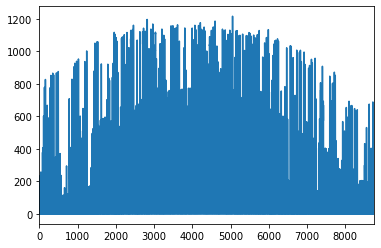

In [88]:
pd.Series(weather.total_sky_matrix.sum(axis=1)).plot()

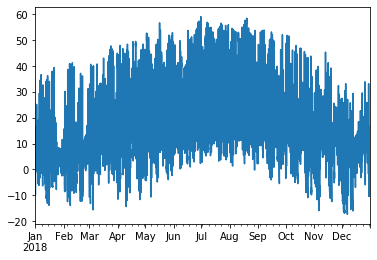

In [10]:
mean_radiant_temperature.plot()


In [66]:
sample_vector_radiation.shape

# Calculate the total radiation received on 1 square metre
A = sample_vectors_altitude[sample_vectors_is_sky]
B = np.array([i[sample_vectors_is_sky] for i in sample_vector_radiation])
C = np.sin(A) * B
ground_1m2_radiation = C.sum(axis=1)

(8760, 1000)

# MEAN RADIANT TEMPERATURE FROM WEATHERFILE!!!!!!!!!!

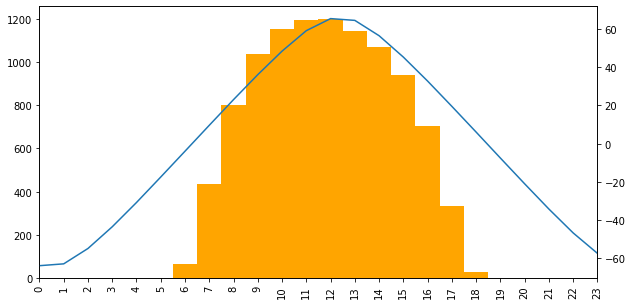

In [115]:
import matplotlib.pyplot as plt
tm = pd.Series(index=weather.index, data=weather.total_sky_matrix.sum(axis=1))

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()

tm.groupby([tm.index.hour]).mean().plot(ax=ax1, kind="bar", width=1, color="Orange")
weather.solar_elevation_angle.groupby([weather.index.hour]).median().plot(ax=ax2)

2018-01-29 00:00:00+04:00       0.000000
2018-01-29 01:00:00+04:00       0.000000
2018-01-29 02:00:00+04:00       0.000000
2018-01-29 03:00:00+04:00       0.000000
2018-01-29 04:00:00+04:00       0.000000
2018-01-29 05:00:00+04:00       0.000000
2018-01-29 06:00:00+04:00       0.000000
2018-01-29 07:00:00+04:00      67.398691
2018-01-29 08:00:00+04:00     143.906537
2018-01-29 09:00:00+04:00    1490.382726
2018-01-29 10:00:00+04:00    1769.603104
2018-01-29 11:00:00+04:00     384.990207
2018-01-29 12:00:00+04:00     420.256224
2018-01-29 13:00:00+04:00     391.285698
2018-01-29 14:00:00+04:00     241.114414
2018-01-29 15:00:00+04:00     196.063549
2018-01-29 16:00:00+04:00     265.392281
2018-01-29 17:00:00+04:00     144.718248
2018-01-29 18:00:00+04:00       0.000000
2018-01-29 19:00:00+04:00       0.000000
2018-01-29 20:00:00+04:00       0.000000
2018-01-29 21:00:00+04:00       0.000000
2018-01-29 22:00:00+04:00       0.000000
2018-01-29 23:00:00+04:00       0.000000
Freq: H, dtype: 

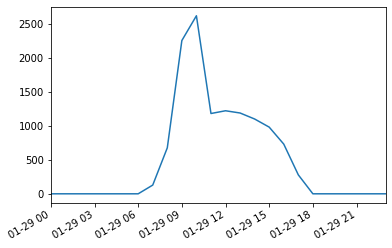

In [90]:
day = "2018-01-29"

# Diffuse matrix
dm = pd.Series(index=weather.index, data=weather.diffuse_sky_matrix.sum(axis=1))

# Direct matrix
drm = pd.Series(index=weather.index, data=weather.direct_sky_matrix.sum(axis=1))

# Total matrix
tm = pd.Series(index=weather.index, data=weather.total_sky_matrix.sum(axis=1))

tm[day].plot()
dm[day].sum() / 1000, drm[day].sum() / 1000, tm[day].sum() / 1000

dm[day]

In [67]:
pd.Series(index=weather.index, data=weather.diffuse_sky_matrix.sum(axis=1))["2018-01-29"].sum()#.plot()#.plot()

5515.111680251351

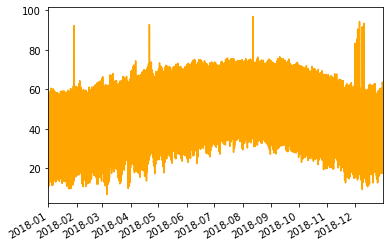

In [39]:


mean_radiant_temperature.plot(c="orange")
# mean_radiant_temperature.plot(kind="hist", bins=60)

# Define the annual method for calculation!!

# Development

In [3]:
nhour = 3183 - 1
weather.index[nhour]

Timestamp('2018-05-13 14:00:00+0000', tz='UTC', freq='60T')

In [27]:
# Pedestrian wind speed
pws = wind_speed_at_height(weather.wind_speed[nhour], h1=10, h2=2.0, rc=0.5, log=True)
# pws = 5.34834
pws

2.5013995959072965

In [28]:
gnd_temp = weather.ground_temperature_1[nhour]
dbt = weather.dry_bulb_temperature[nhour]
dpt = weather.dew_point_temperature[nhour]
rh = weather.relative_humidity[nhour]
tot_sky_cover = weather.total_sky_cover[nhour] / 10
hir = weather.horizontal_infrared_radiation_intensity[nhour]

(gnd_temp, dbt, dpt, rh, tot_sky_cover, hir)

(7.75, 11.0, 11.0, 100, 0.8, 332)

In [29]:
# Generate Numerous Vectors
weather.generate_numerous_vectors()
tsm = weather.total_sky_matrix[nhour]
vec = weather.nv_sample_vectors
alt = weather.nv_sample_thetas
sky = weather.nv_sample_sky

tsm[0:4], vec[0:4], alt[0:4], sky[0:4], 

(array([0.74866746, 0.74859408, 0.74859408, 0.7497263 ]),
 array([[ 0.04471018, -0.999     ,  0.        ],
        [-0.05707349, -0.997     ,  0.052284  ],
        [ 0.00873164, -0.995     , -0.0994925 ],
        [ 0.07186536, -0.993     ,  0.09373564]]),
 array([0.        , 0.05230785, 0.09965738, 0.09387345]),
 array([False,  True, False,  True]))

In [13]:
np.interp(np.power(weather.relative_humidity, 3), [0, 1e6], [0.33, 1.4])

array([1.19066199, 1.03459821, 1.03459821, ..., 1.03459821, 0.89864187,
       1.19066199])

In [30]:
# Surface Temperature "k"
k = np.interp(np.power(rh, 3), [0, 1e6], [0.33, 1.4])
k

1.4

In [31]:
weather.calculate_sky_emissivity()
se = weather.sky_emissivity[nhour]
se

0.8311482273571045

In [32]:
material = {'Concrete (Medium Rough)': {"D": 10.79, "E": 4.192, "F": 0}}
c_hc = material['Concrete (Medium Rough)']["D"] + material['Concrete (Medium Rough)']["E"] * pws + material['Concrete (Medium Rough)']["F"] * np.power(pws, 2)
c_hc

21.275867106043385

In [10]:
pc = weather.patch_centroids
pc[0:4]

array([[0.      , 0.997474, 0.054056],
       [0.104264, 0.99201 , 0.054056],
       [0.207387, 0.975677, 0.054056],
       [0.308237, 0.948654, 0.054056]])

In [11]:
weather.resample_sky_dome()
item = weather.nv_sample_indices
dis = weather.nv_sample_distances
item[0:3], dis[0:3]

(array([[30, 29, 31],
        [31, 30, 91],
        [30, 29, 31]]), array([[0.0701668 , 0.08073146, 0.15863233],
        [0.04748667, 0.05710296, 0.11968513],
        [0.15381647, 0.18086602, 0.19066751]]))

In [12]:
weather.calculate_sun_view_factor()
svf = weather.nv_sun_view_factor
svf[0:10]

array([0.        , 0.28872487, 0.        , 0.28932453, 0.        ,
       0.        , 0.28929047, 0.        , 0.28892727, 0.28910144])

In [13]:
weather.ray_trace_1000()
last_vector = weather.nv_last_ray_bounce_vector
len_int = weather.nv_intersected_points
last_vector[0:4], len_int[0:7], 

(array([[ 0.04471 , -0.999   ,  0.      ],
        [-0.057073, -0.997   ,  0.052284],
        [ 0.008732, -0.995   ,  0.099493],
        [ 0.071865, -0.993   ,  0.093736]]), array([0, 0, 1, 0, 1, 1, 0]))

In [14]:
# weather.closest_point(vec, last_vector[0])

from scipy import spatial
_, inds = spatial.KDTree(vec).query(last_vector, 1)
inds[0:7]

array([0, 1, 3, 3, 4, 8, 6])

In [15]:
weather.calculate_numerous_vector_radiation_values()
nvrad = weather.nv_radiation[nhour]
nvrad[0:8]
# Differences from interpretation of direct/diffuse radiaiton skly dome values - mine is better :)

array([0.        , 1.18559257, 0.        , 1.07918591, 0.        ,
       0.        , 1.14858183, 0.        ])

In [16]:
weather.m2_total_radiation()
m2rad = weather.nv_m2_radiation[nhour]
m2rad

458.08880400038174

In [17]:
weather.calculate_ein()
ein = weather.nv_ein[nhour]
ein[0:7]

array([0.        , 0.34231006, 0.31223495, 0.31223495, 0.        ,
       0.29723874, 0.33227377])

In [48]:
# Ein Out
ground_albedo = 0.2
Eout = sum(np.power(ground_albedo, len_int) * ein)
Eout

240.120035336094

In [58]:
emissivity = 0.8
absorptivity = 0.6
tickness = 0.8
# k = k
Ein = m2rad
Tin = gnd_temp
Ta = dbt
hc = c_hc

d=5.67*(10**(-8))
Tin=Tin+273.15
Ta=Ta+273.15
a=emissivity*d
b=k/tickness+hc
c=-(k*Tin/tickness+Ein*absorptivity+hc*Ta)


Ts=[]
nnn=[]
try:
    X = 1/2 *math.sqrt((4*(2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a))-1/2*math.sqrt(-(2*b)/(a *math.sqrt((4* (2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27 *a**2 *b**4-256* a**3* c**3)+9*a*b**2)**(1/3)+(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)))-(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)-(4*(2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27*a**2* b**4-256* a**3*c**3)+9*a*b**2)**(1/3))
    if 0<X:
        Ts.append(X)
except: nnn.append(1)

try:
    X = 1/2 *math.sqrt((4*(2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a))+1/2*math.sqrt(-(2*b)/(a*math.sqrt((4*(2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)))-(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)-(4*(2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3))
    if 0<X:
        Ts.append(X)
except: nnn.append(2)

try:
    X =-1/2 *math.sqrt((4*(2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a))-1/2*math.sqrt((2*b)/(a*math.sqrt((4*(2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)))-(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)-(4*(2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3))
    if 0<X:
        Ts.append(X)
except: nnn.append(3)

try:
    X = 1/2 *math.sqrt((2*b)/(a*math.sqrt((4*(2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)))-(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a)-(4*(2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3))-1/2*math.sqrt((4*(2/3)**(1/3)*c)/(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)+(math.sqrt(3)*math.sqrt(27*a**2*b**4-256*a**3*c**3)+9*a*b**2)**(1/3)/(2**(1/3)*3**(2/3)*a))
    if 0<X:
        Ts.append(X)
except: nnn.append(4)
print(nnn)

Tsc=[]
for i in Ts:
    Tsc.append(i-273.15)
e_out=[]
for i in Ts:
    E=a*(i**4)
    e_out.append(E)

# Surface tempertaure
Ts

[1, 2]


[283.1729880630722]

In [59]:
# Atmospheric Radiation

SVF = 1
TotalSky = se * hir * SVF

TotalSky

275.9412114825587

In [60]:
# Solar Radiation

σ= 5.6697*10**(-8)
ap=0.7
if Eout:
    TotalSol=ap*Eout
else: 
    TotalSol=0
TotalSol

168.08402473526579

In [63]:
#Ground radiation

#Eurb = σ.ε.Ts**4
#Floor Fv= 0.4

A1 = 1.2  # Human area
σ= 5.6697*10**(-8)
R=[]
A2=1
for t in Ts:
    if t:
        a=(A1/A2)  *   emissivity   *   (σ*emissivity*t**4)   *    .4
        R.append(a)
SR=sum(R)
SR

111.99240865983995

In [67]:
σ= 5.6697e-8
Tmrt = np.power(((TotalSky + TotalSol + SR) / σ), 0.25) - 273.15
Tmrt

41.53940663065487